In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, errno
import pandas as pd
from scipy.stats import ttest_ind_from_stats
import scipy.interpolate as interp
import scipy.signal as signal
from utils_EF import *
%matplotlib nbagg

celltype = 'HS'
csvroot = "C:/Users/Huayi/Google Drive/Desplan Lab/FuncExpt/Ephys/data/"
pageName = 'Set1dupe'

# bin & save raw data for HS, HS_R, HS_L (or HS), across all Flash & Edge conditions
allEFs(celltype,csvroot,pageName)

# get the means, and plot the peaks. Compte, plot & save p_idx.
pltEF(csvroot, celltype)


In [3]:
MeanName = 'Meandf'#'Meandf'
CellName = 'celldf'#'celldf'
datatype = 'Vm' #Vm #AP

(FlashOnMeanL, FlashOnCellL, FlashOnlenCellL, EdgeOnMeanL, EdgeOnCellL, EdgeOnlenCellL, 
EdgeOnMeanLv, EdgeOnCellLv, EdgeOnlenCellLv,
FlashOnMeanR, FlashOnCellR, FlashOnlenCellR, EdgeOnMeanR, EdgeOnCellR, EdgeOnlenCellR,
EdgeOnMeanRv, EdgeOnCellRv, EdgeOnlenCellRv,
FlashOnMean, FlashOnCell, FlashOnlenCell, EdgeOnMean, EdgeOnCell, EdgeOnlenCell,
EdgeOnMeanv, EdgeOnCellv, EdgeOnlenCellv) = OnData(MeanName, CellName, csvroot,celltype)

(FlashOffMeanL, FlashOffCellL, FlashOfflenCellL, EdgeOffMeanL, EdgeOffCellL, EdgeOfflenCellL,
EdgeOffMeanLv, EdgeOffCellLv, EdgeOfflenCellLv,
FlashOffMeanR, FlashOffCellR, FlashOfflenCellR, EdgeOffMeanR, EdgeOffCellR, EdgeOfflenCellR,
EdgeOffMeanRv, EdgeOffCellRv, EdgeOfflenCellRv,
FlashOffMean, FlashOffCell, FlashOfflenCell, EdgeOffMean, EdgeOffCell, EdgeOfflenCell,
EdgeOffMeanv, EdgeOffCellv, EdgeOfflenCellv) = OffData(MeanName, CellName, csvroot,celltype)

In [4]:
Onsizelsdf, OnHighdf, OnLowdf, OnHighnormdf, OnLownormdf, OnAvgdf, OnAvgnormdf,OnHighidxdf, OnLowidxdf, OnHonsetidxdf, OnHoffsetidxdf, OnLonsetidxdf, OnLoffsetidxdf = EdgePeaknIdx(csvroot,celltype,EdgeOnCell)
Offsizelsdf, OffHighdf, OffLowdf, OffHighnormdf, OffLownormdf,OffAvgdf, OffAvgnormdf,OffHighidxdf, OffLowidxdf, OffHonsetidxdf, OffHoffsetidxdf, OffLonsetidxdf, OffLoffsetidxdf = EdgePeaknIdx(csvroot,celltype,EdgeOffCell)


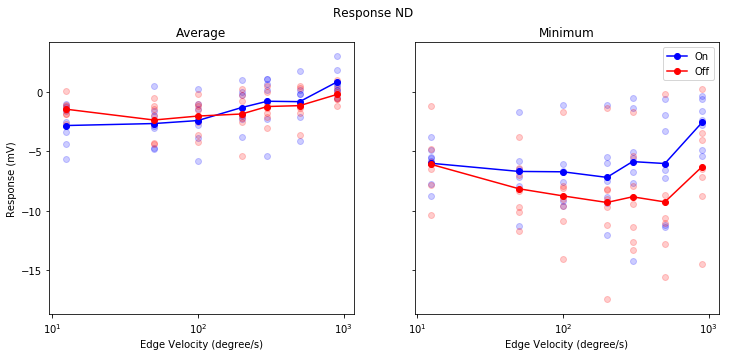

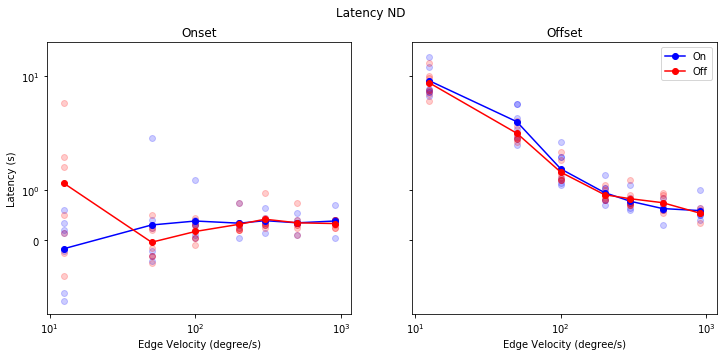

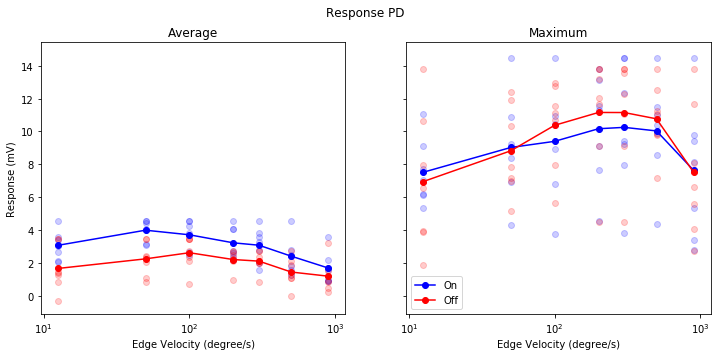

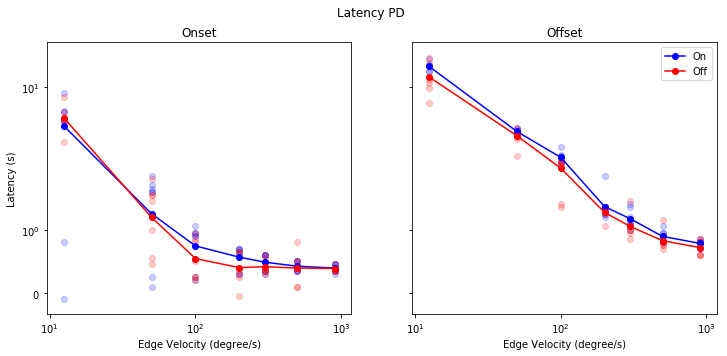

In [5]:
pltEdgeLatResp(csvroot,celltype,OnAvgnormdf,OffAvgnormdf,OnLownormdf,
                   OffLownormdf,OnLonsetidxdf,OffLonsetidxdf, OnLoffsetidxdf,OffLoffsetidxdf,
                   OnHighnormdf,OffHighnormdf,OnHonsetidxdf,OffHonsetidxdf,
                   OnHoffsetidxdf,OffHoffsetidxdf)

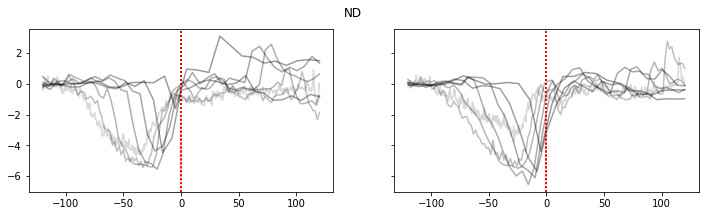

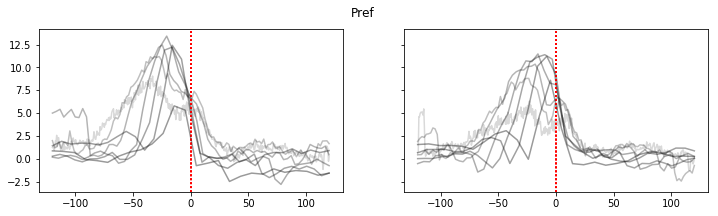

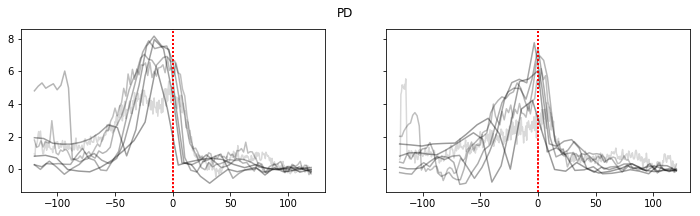

In [42]:
pltEdgeTracesSpace(csvroot, celltype, EdgeOnMean,EdgeOnMeanL,EdgeOnMeanR,EdgeOffMean,EdgeOffMeanL,EdgeOffMeanR)

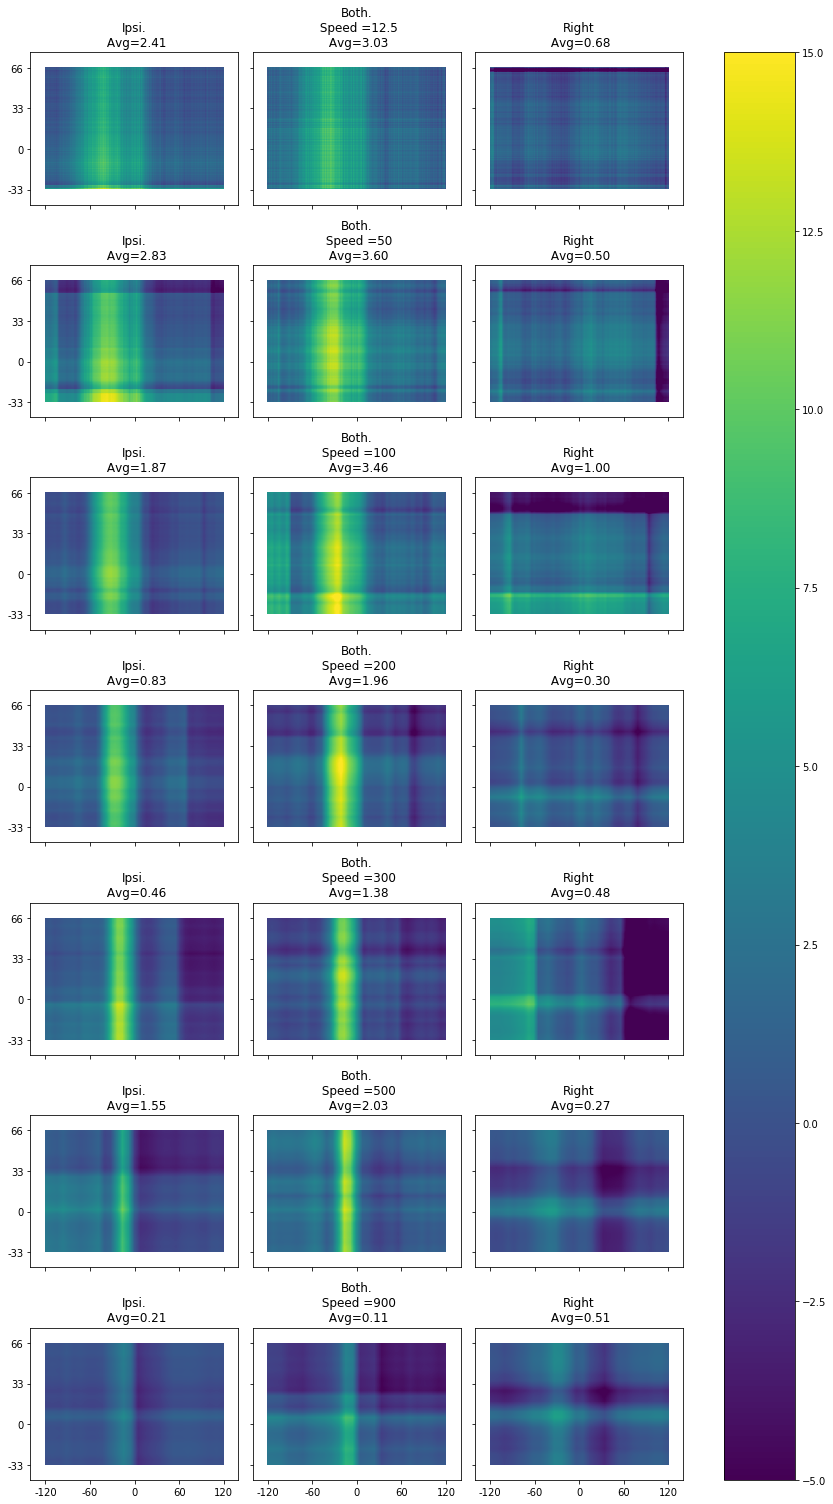

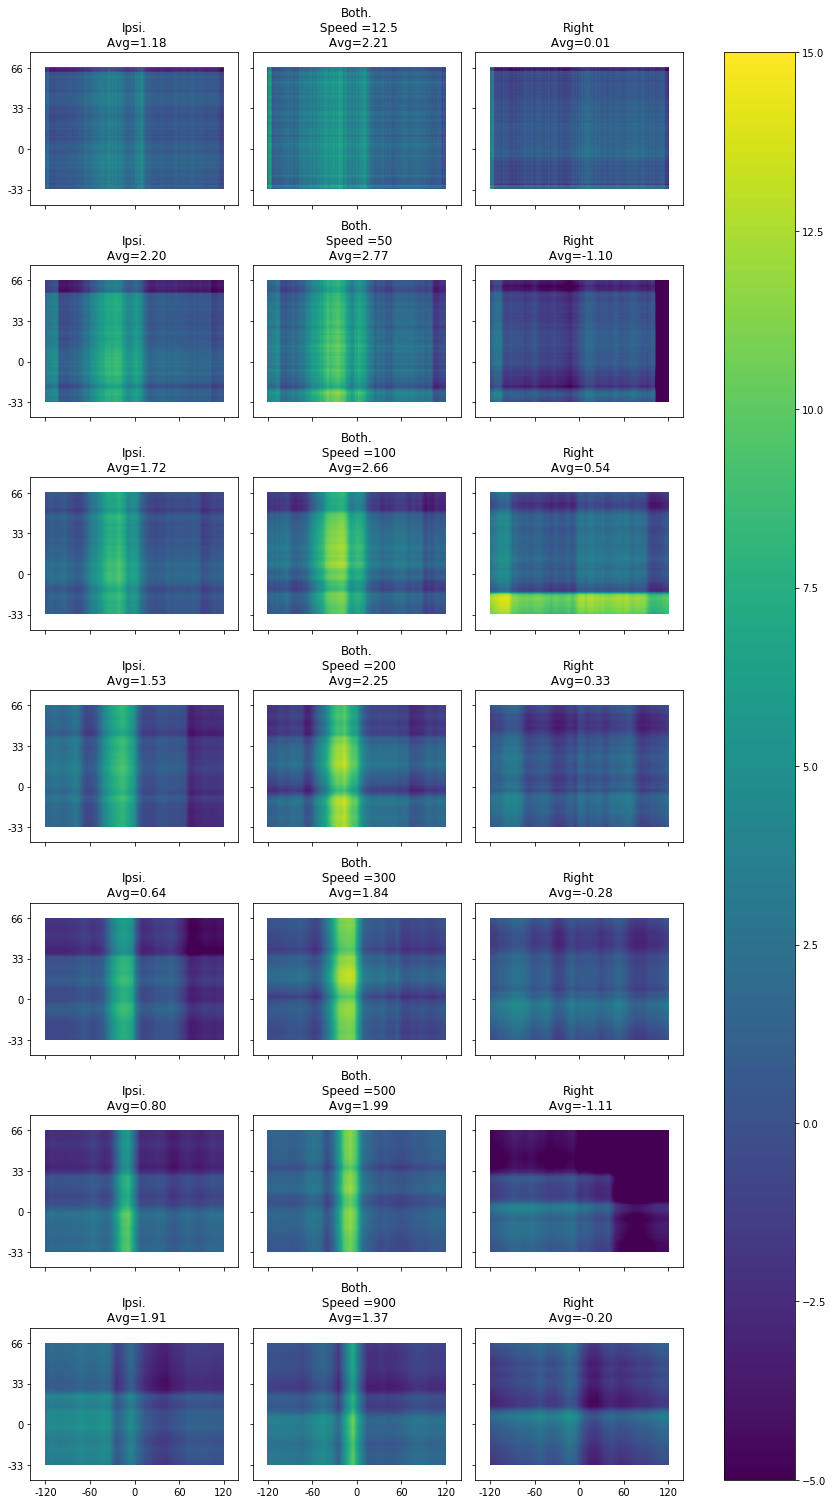

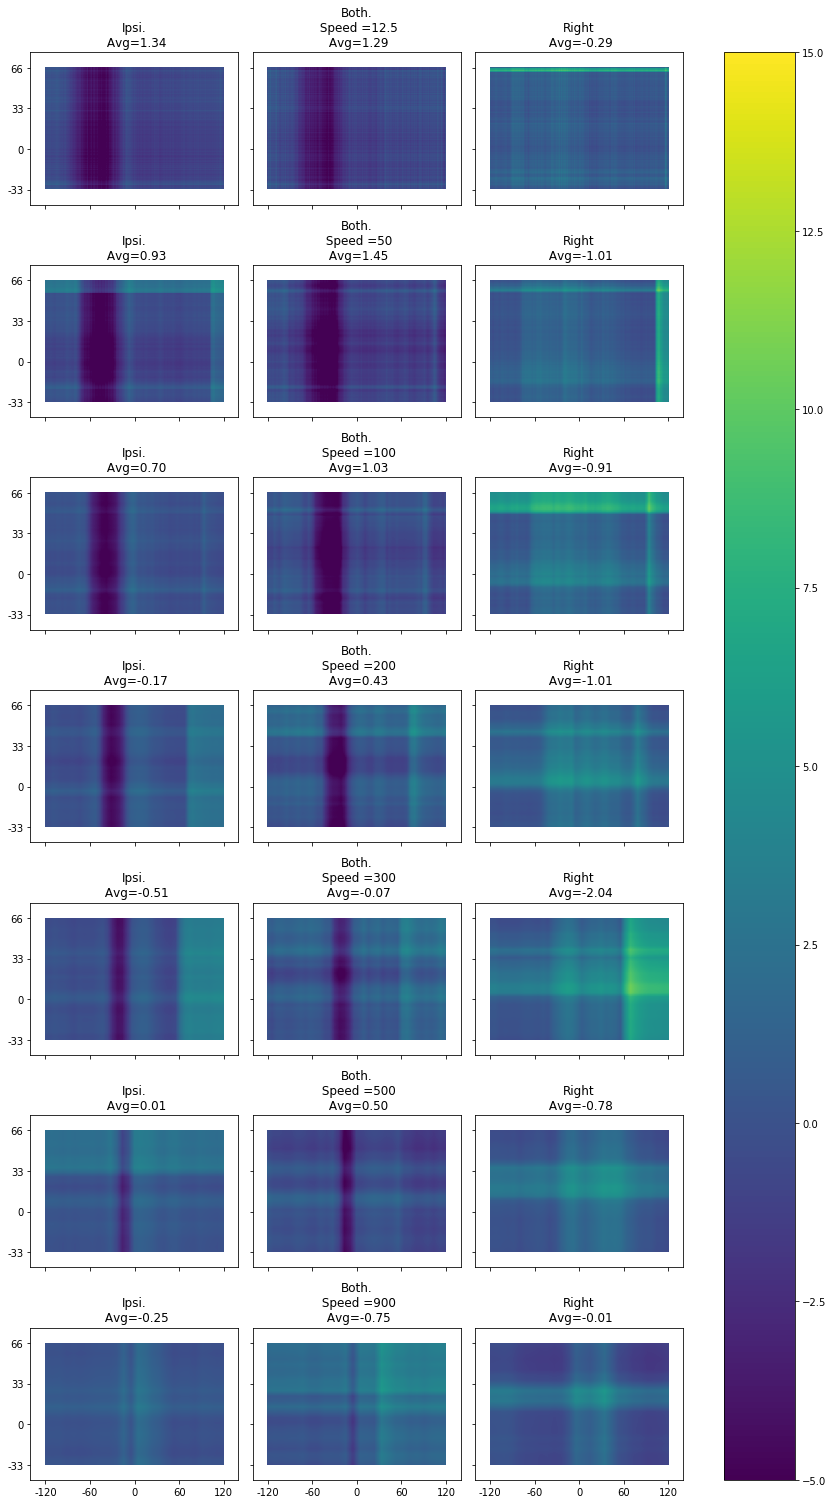

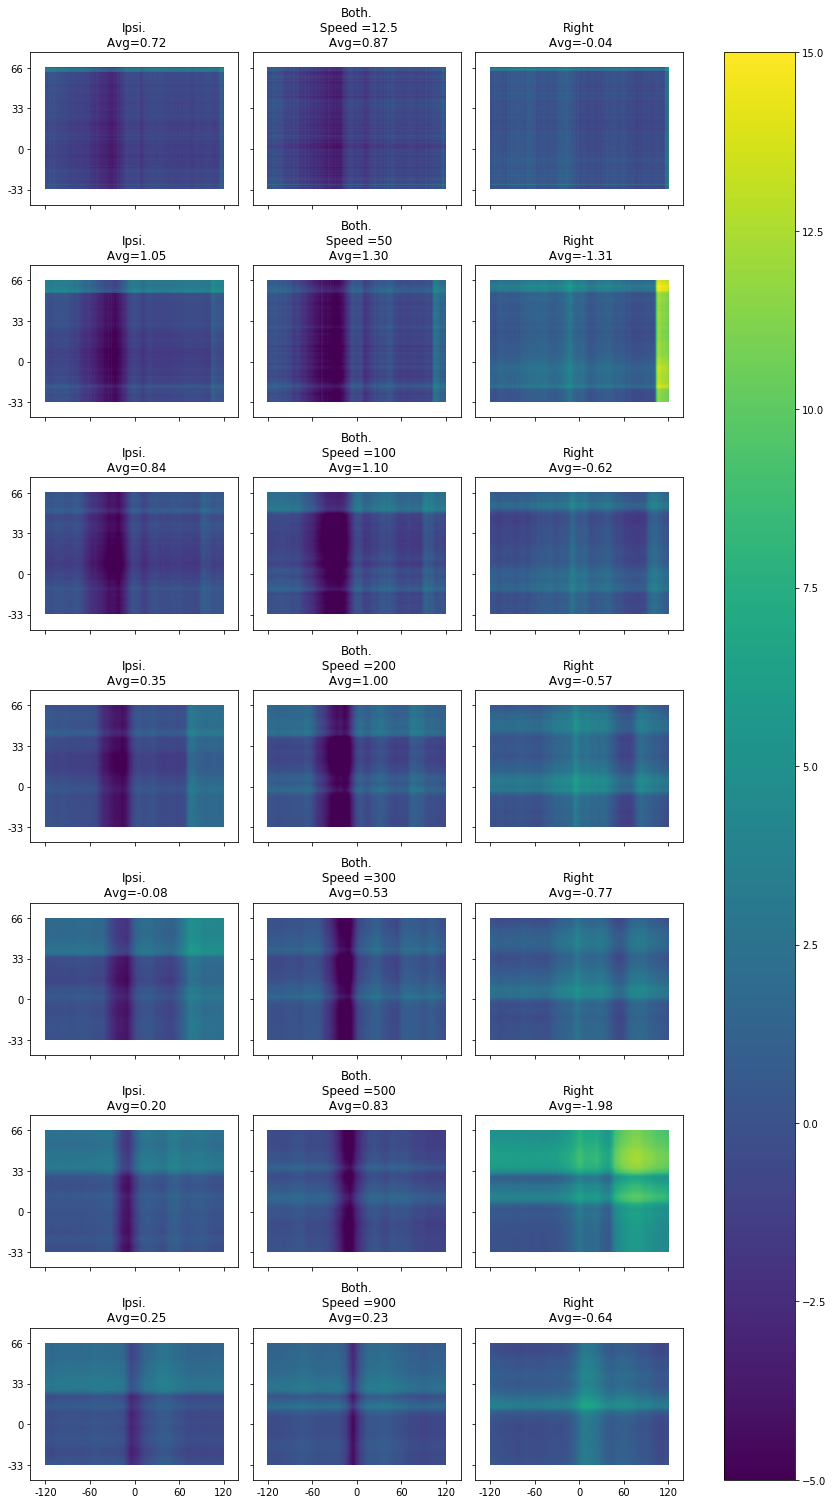

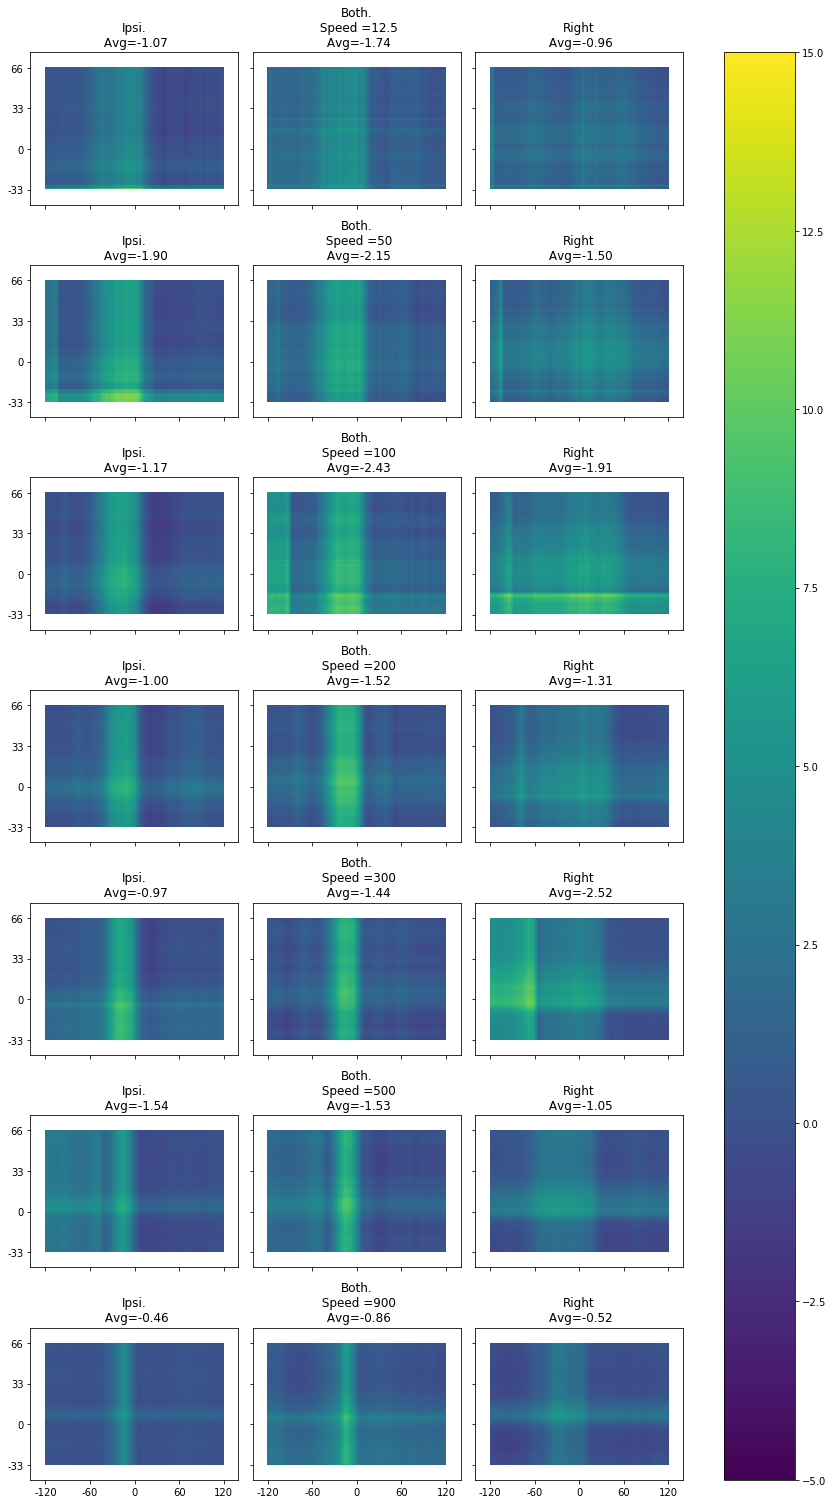

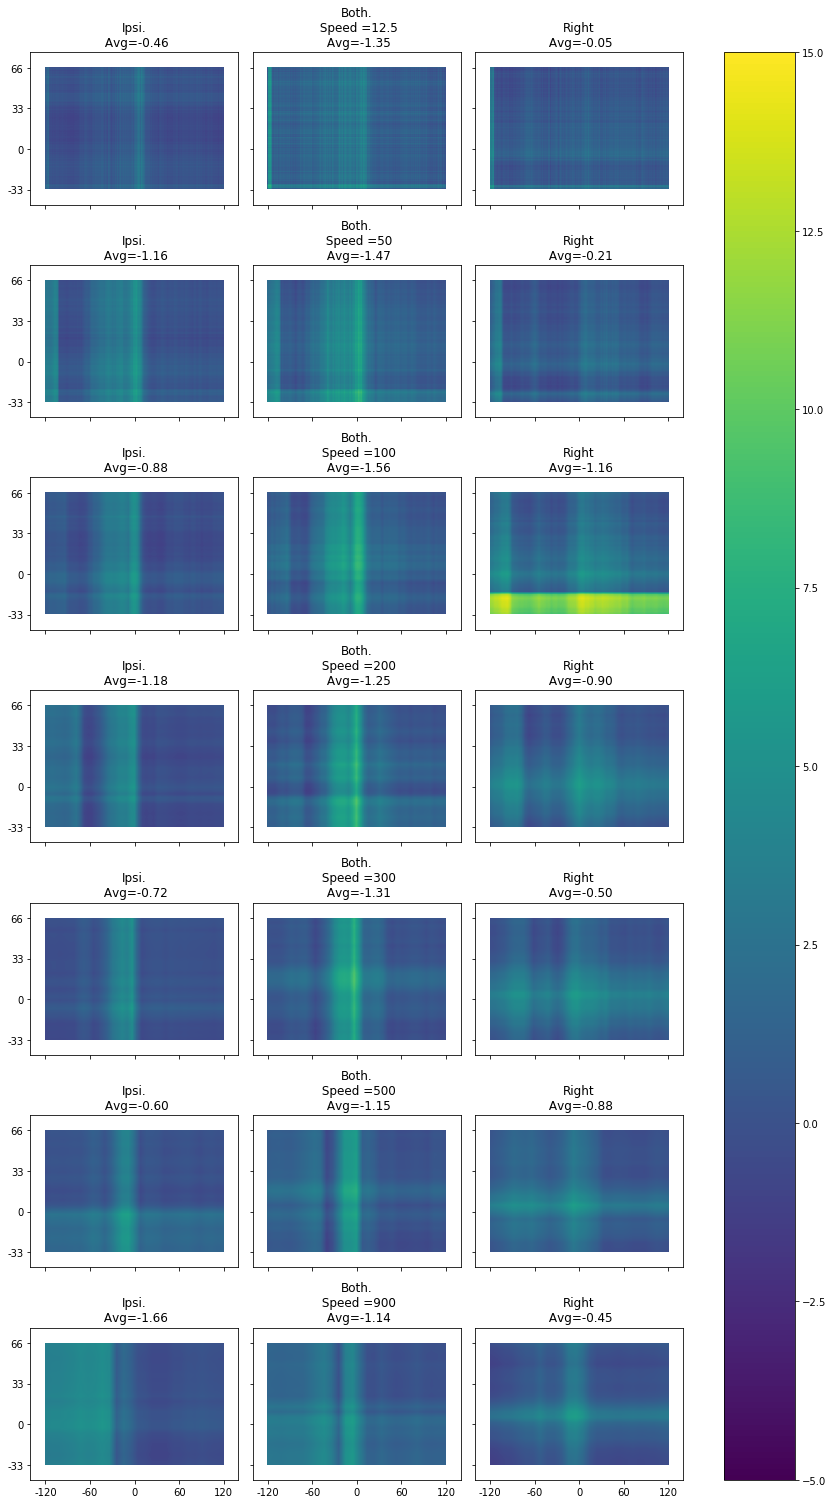

In [3]:
# plot images of On & Offs
nanidx = np.asarray([np.shape(i)[1] - i.isna().sum(axis=1).values for i in [EdgeOnMean,EdgeOnMeanL,EdgeOnMeanR,EdgeOffMean,EdgeOffMeanL,EdgeOffMeanR]]).reshape((12,7))
nanidx_min = nanidx.min(axis=0)

nanidxv = np.asarray([np.shape(i)[1] - i.isna().sum(axis=1).values for i in [EdgeOnMeanv,EdgeOnMeanLv,EdgeOnMeanRv,EdgeOffMeanv,EdgeOffMeanLv,EdgeOffMeanRv]]).reshape((12,7))
nanidxv_min = nanidxv.min(axis=0)


EdgePref('On', csvroot,celltype, EdgeOnMean,EdgeOnMeanL,EdgeOnMeanR,EdgeOnMeanv,EdgeOnMeanLv,EdgeOnMeanRv,nanidx_min, nanidxv_min)
EdgePref('Off', csvroot,celltype,EdgeOffMean,EdgeOffMeanL,EdgeOffMeanR,EdgeOffMeanv,EdgeOffMeanLv,EdgeOffMeanRv,nanidx_min, nanidxv_min)

EdgePD('On', csvroot,celltype,EdgeOnMean,EdgeOnMeanL,EdgeOnMeanR,EdgeOnMeanv,EdgeOnMeanLv,EdgeOnMeanRv,nanidx_min, nanidxv_min)
EdgePD('Off',csvroot,celltype, EdgeOffMean,EdgeOffMeanL,EdgeOffMeanR,EdgeOffMeanv,EdgeOffMeanLv,EdgeOffMeanRv,nanidx_min, nanidxv_min)

EdgeND('On',csvroot, celltype,EdgeOnMean,EdgeOnMeanL,EdgeOnMeanR,EdgeOnMeanv,EdgeOnMeanLv,EdgeOnMeanRv,nanidx_min, nanidxv_min)
EdgeND('Off',csvroot, celltype, EdgeOffMean,EdgeOffMeanL,EdgeOffMeanR,EdgeOffMeanv,EdgeOffMeanLv,EdgeOffMeanRv,nanidx_min, nanidxv_min)

In [2]:
# ## to run things one by one.
# # check df
# csvpath = csvroot+'%s/%s.xlsx' %(celltype,celltype)
# xls = pd.ExcelFile(csvpath)
# df = pd.read_excel(xls, pageName)
# df = df.copy()
# df

# stimulus = 'Edges_dark_vel_vert_grey'#'Edges_light_vel_grey'#'flashOnOff_mHz_grey'
# ls = [12.5,50,100,200,300,500,900,-12.5,-50,-100,-200,-300,-500,-900]
# #ls = [60,120,180,240,300,360,420]#ls = [12.5,50,100,200,300,500,900,-12.5,-50,-100,-200,-300,-500,-900]
# if celltype[:2] == 'HS':
#     Meandf,Rawdf,celldf= MergeBincells(df,csvroot,stimulus,ls,celltype)
# else:
#     MeanBindf,RawBindf,cellBindf,Meandf,Rawdf,celldf = MergeBincells(df,csvroot,stimulus,ls,celltype)        

<IPython.core.display.Javascript object>


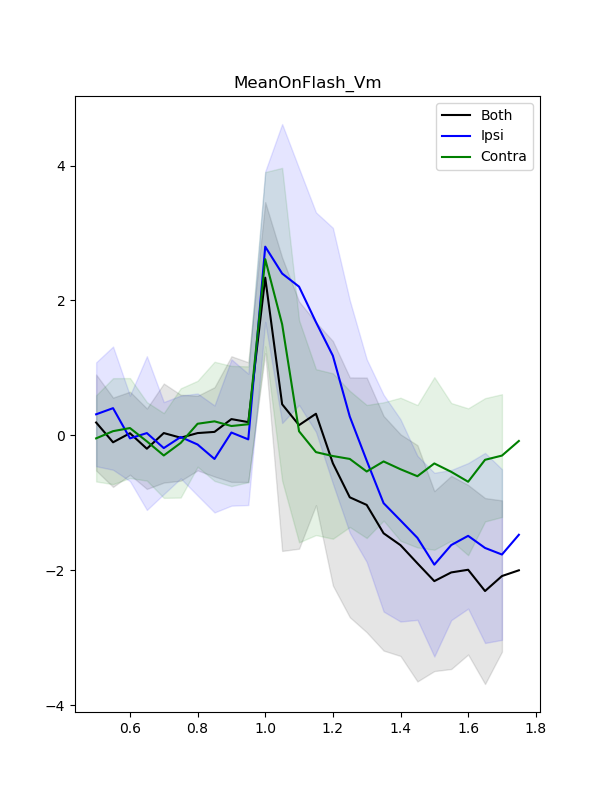

<IPython.core.display.Javascript object>


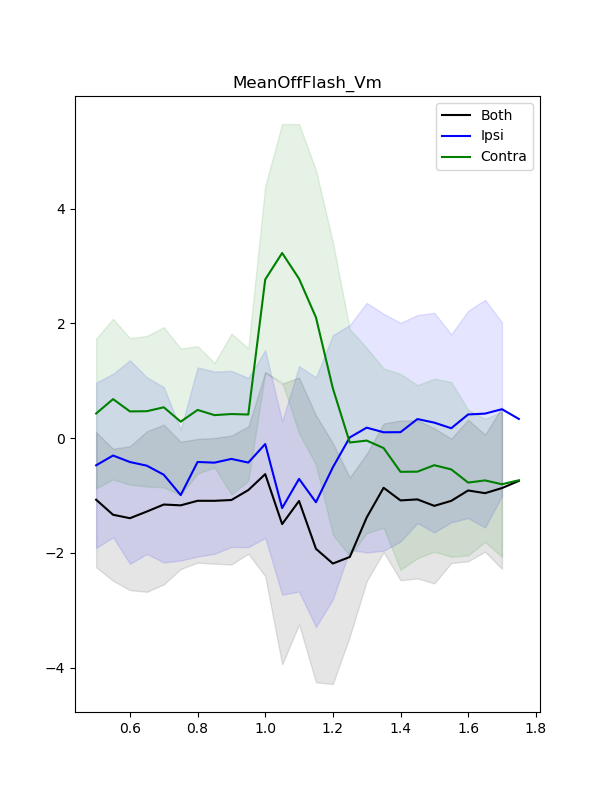

<IPython.core.display.Javascript object>


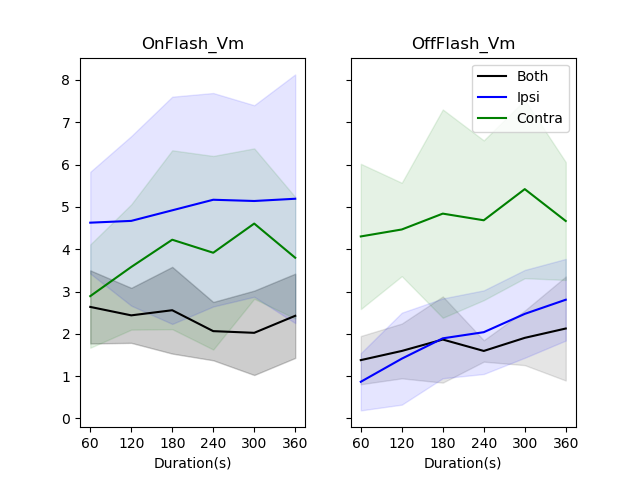

<IPython.core.display.Javascript object>


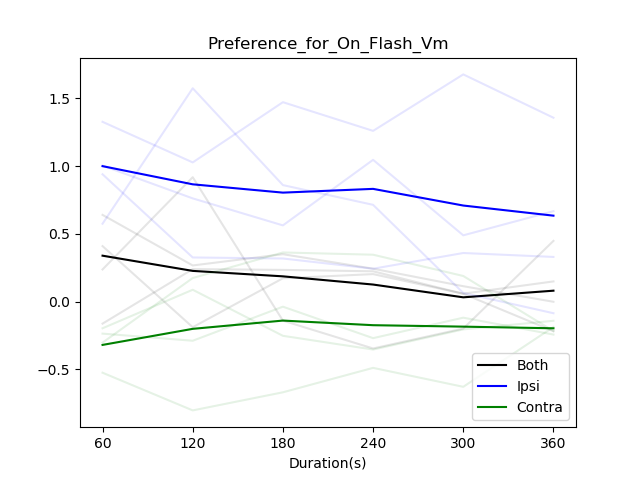

In [45]:
FlashMeanPeak(csvroot, datatype, FlashOnCell,FlashOnCellL,FlashOnCellR,FlashOffCell,FlashOffCellL,FlashOffCellR)
FlashDurIdx(csvroot, datatype, FlashOnCell,FlashOnCellL,FlashOnCellR,FlashOffCell,FlashOffCellL,FlashOffCellR)
EdgeOnPeakdf, EdgeOnPeakLdf, EdgeOnPeakRdf, EdgeOnMindf, EdgeOnMinLdf, EdgeOnMinRdf = EdgeOnPeak(csvroot, datatype,EdgeOnCell,EdgeOnCellL,EdgeOnCellR)
EdgeOffPeakdf, EdgeOffPeakLdf, EdgeOffPeakRdf, EdgeOffMindf, EdgeOffMinLdf, EdgeOffMinRdf = EdgeOffPeak(csvroot, datatype,EdgeOffCell,EdgeOffCellL,EdgeOffCellR)

sti = [-900, -500, -300,-200,-100,-50, -12.5, 12.5,50,100,200,300,500,900]

# for HS. The R & L are compared to 'both'
pidxOn = (EdgeOnPeakdf.values[:,1][:7][::-1] - EdgeOnMindf.values[:,1][7:])/np.max(EdgeOnPeakdf.values[:,1][:7][::-1] + abs(EdgeOnMindf.values[:,1][7:]))
pidxOff = (EdgeOffPeakdf.values[:,1][:7][::-1] - EdgeOffMindf.values[:,1][7:])/np.max(EdgeOffPeakdf.values[:,1][:7][::-1] + abs(EdgeOffMindf.values[:,1][7:]))

pidxOnL = (EdgeOnPeakLdf.values[:,1][:7][::-1] - EdgeOnMinLdf.values[:,1][7:])/np.max(EdgeOnPeakdf.values[:,1][:7][::-1] + abs(EdgeOnMindf.values[:,1][7:]))
pidxOffL = (EdgeOffPeakLdf.values[:,1][:7][::-1] - EdgeOffMinLdf.values[:,1][7:])/np.max(EdgeOffPeakdf.values[:,1][:7][::-1] + abs(EdgeOffMindf.values[:,1][7:]))

pidxOnR = (EdgeOnPeakRdf.values[:,1][:7][::-1] - EdgeOnMinRdf.values[:,1][7:])/np.max(EdgeOnPeakdf.values[:,1][:7][::-1] + abs(EdgeOnMindf.values[:,1][7:]))
pidxOffR = (EdgeOffPeakRdf.values[:,1][:7][::-1] - EdgeOffMinRdf.values[:,1][7:])/np.max(EdgeOffPeakdf.values[:,1][:7][::-1] + abs(EdgeOffMindf.values[:,1][7:]))

# what I used for H2 before 04/2019
#pidxOn = idxsign*(EdgeOnPeakdf.values[:,1][7:] - EdgeOnPeakdf.values[:,1][:7][::-1])/(EdgeOnPeakdf.values[:,1][7:] + abs(EdgeOnPeakdf.values[:,1][:7][::-1]))
#pidxOff = idxsign*(EdgeOffPeakdf.values[:,1][7:] - EdgeOffPeakdf.values[:,1][:7][::-1])/(EdgeOffPeakdf.values[:,1][7:] + abs(EdgeOffPeakdf.values[:,1][:7][::-1]))

#pidxOnL = idxsign*(EdgeOnPeakLdf.values[:,1][7:] - EdgeOnPeakLdf.values[:,1][:7][::-1])/(EdgeOnPeakLdf.values[:,1][7:] + abs(EdgeOnPeakLdf.values[:,1][:7][::-1]))
#pidxOffL = idxsign*(EdgeOffPeakLdf.values[:,1][7:] - EdgeOffPeakLdf.values[:,1][:7][::-1])/(EdgeOffPeakLdf.values[:,1][7:] + abs(EdgeOffPeakLdf.values[:,1][:7][::-1]))

#pidxOnR = idxsign*(EdgeOnPeakRdf.values[:,1][7:] - EdgeOnPeakRdf.values[:,1][:7][::-1])/(EdgeOnPeakRdf.values[:,1][7:] + abs(EdgeOnPeakRdf.values[:,1][:7][::-1]))
#pidxOffR = idxsign*(EdgeOffPeakRdf.values[:,1][7:] - EdgeOffPeakRdf.values[:,1][:7][::-1])/(EdgeOffPeakRdf.values[:,1][7:] + abs(EdgeOffPeakRdf.values[:,1][:7][::-1]))

plt.figure()
plt.plot(sti[7:],pidxOn, 'k'); plt.plot(sti[7:],pidxOnL, 'b'); plt.plot(sti[7:],pidxOnR, 'g')
plt.xticks(sti[7:]); plt.legend(['Both','Ipsi','Contra']); plt.xlabel('Speed(degree/s)'); #plt.xscale('symlog')
plt.title('OnPreferenceIdx_'+datatype); plt.savefig(csvroot+'Pics/On_Preference_Idx_'+datatype)

plt.figure()
plt.plot(sti[7:],pidxOff, 'k'); plt.plot(sti[7:],pidxOffL, 'b'); plt.plot(sti[7:],pidxOffR, 'g')
plt.xticks(sti[7:]); plt.legend(['Both','Ipsi','Contra']); plt.xlabel('Speed(degree/s)'); #plt.xscale('symlog')
plt.title('OffPreferenceIdx_'+datatype); plt.savefig(csvroot+'Pics/Off_Preference_Idx_'+datatype)

pidxOndf = pd.DataFrame({'Angles':sti[7:], 'pidxOn':pidxOn, 'pidxOnL':pidxOnL, 'pidxOnR':pidxOnR})
pidxOffdf = pd.DataFrame({'Angles':sti[7:], 'pidxOff':pidxOff, 'pidxOffL':pidxOffL, 'pidxOffR':pidxOffR})

pidxOndf.to_csv(csvroot+'Analysis/Edge_peak/pidxOndf_%s.csv' %datatype)
pidxOffdf.to_csv(csvroot+'Analysis/Edge_peak/pidxOffdf_%s.csv' %datatype)


<IPython.core.display.Javascript object>


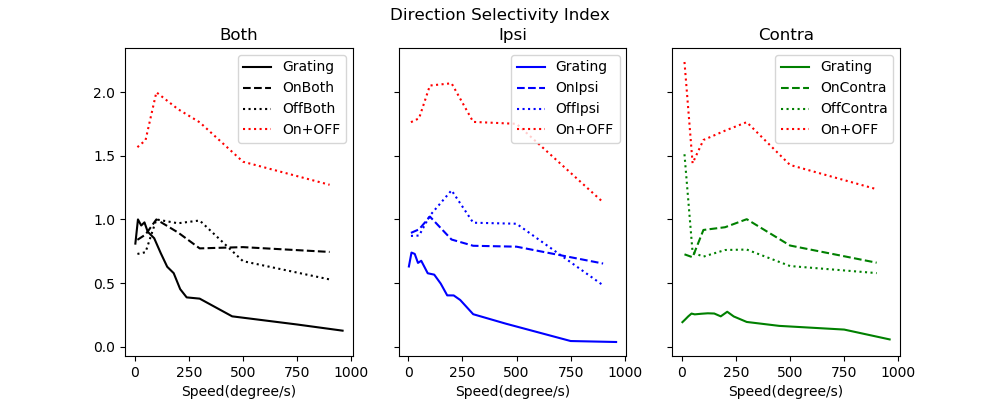

In [48]:
# for HS, need to change for H2
sti = [-900, -500, -300,-200,-100,-50, -12.5, 12.5,50,100,200,300,500,900]

PDNDpidxdf = pd.read_csv(csvroot + "Analysis/Sine_PDND_lambda30_zHz/npidxdf_Vm_norm.csv")
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True,figsize=(10,4))
fig.suptitle('Direction Selectivity Index')
axes[0].plot(PDNDpidxdf['angles']*30,PDNDpidxdf['pidx'], 'k'); 
axes[0].plot(sti[7:],pidxOn, '--k'); axes[0].plot(sti[7:],pidxOff, ':k'); axes[0].plot(sti[7:],pidxOn + pidxOff, ':r');
axes[1].plot(PDNDpidxdf['angles']*30,PDNDpidxdf['pidxL'], 'b'); 
axes[1].plot(sti[7:],pidxOnL, '--b'); axes[1].plot(sti[7:],pidxOffL, ':b'); axes[1].plot(sti[7:],pidxOnL + pidxOffL, ':r');
axes[2].plot(PDNDpidxdf['angles']*30,PDNDpidxdf['pidxR'], 'g'); 
axes[2].plot(sti[7:],pidxOnR, '--g'); axes[2].plot(sti[7:],pidxOffR, ':g'); axes[2].plot(sti[7:],pidxOnR + pidxOffR, ':r');
axes[0].legend(['Grating','OnBoth','OffBoth', 'On+OFF']); axes[1].legend(['Grating','OnIpsi','OffIpsi', 'On+OFF']);
axes[2].legend(['Grating','OnContra','OffContra','On+OFF']); 
axes[0].set_title('Both'); axes[1].set_title('Ipsi'); axes[2].set_title('Contra'); 
axes[0].set_xlabel('Speed(degree/s)'); axes[1].set_xlabel('Speed(degree/s)'); axes[2].set_xlabel('Speed(degree/s)'); 
plt.savefig(csvroot + 'Pics/DirectionSelectivityIndex.jpeg')

<IPython.core.display.Javascript object>


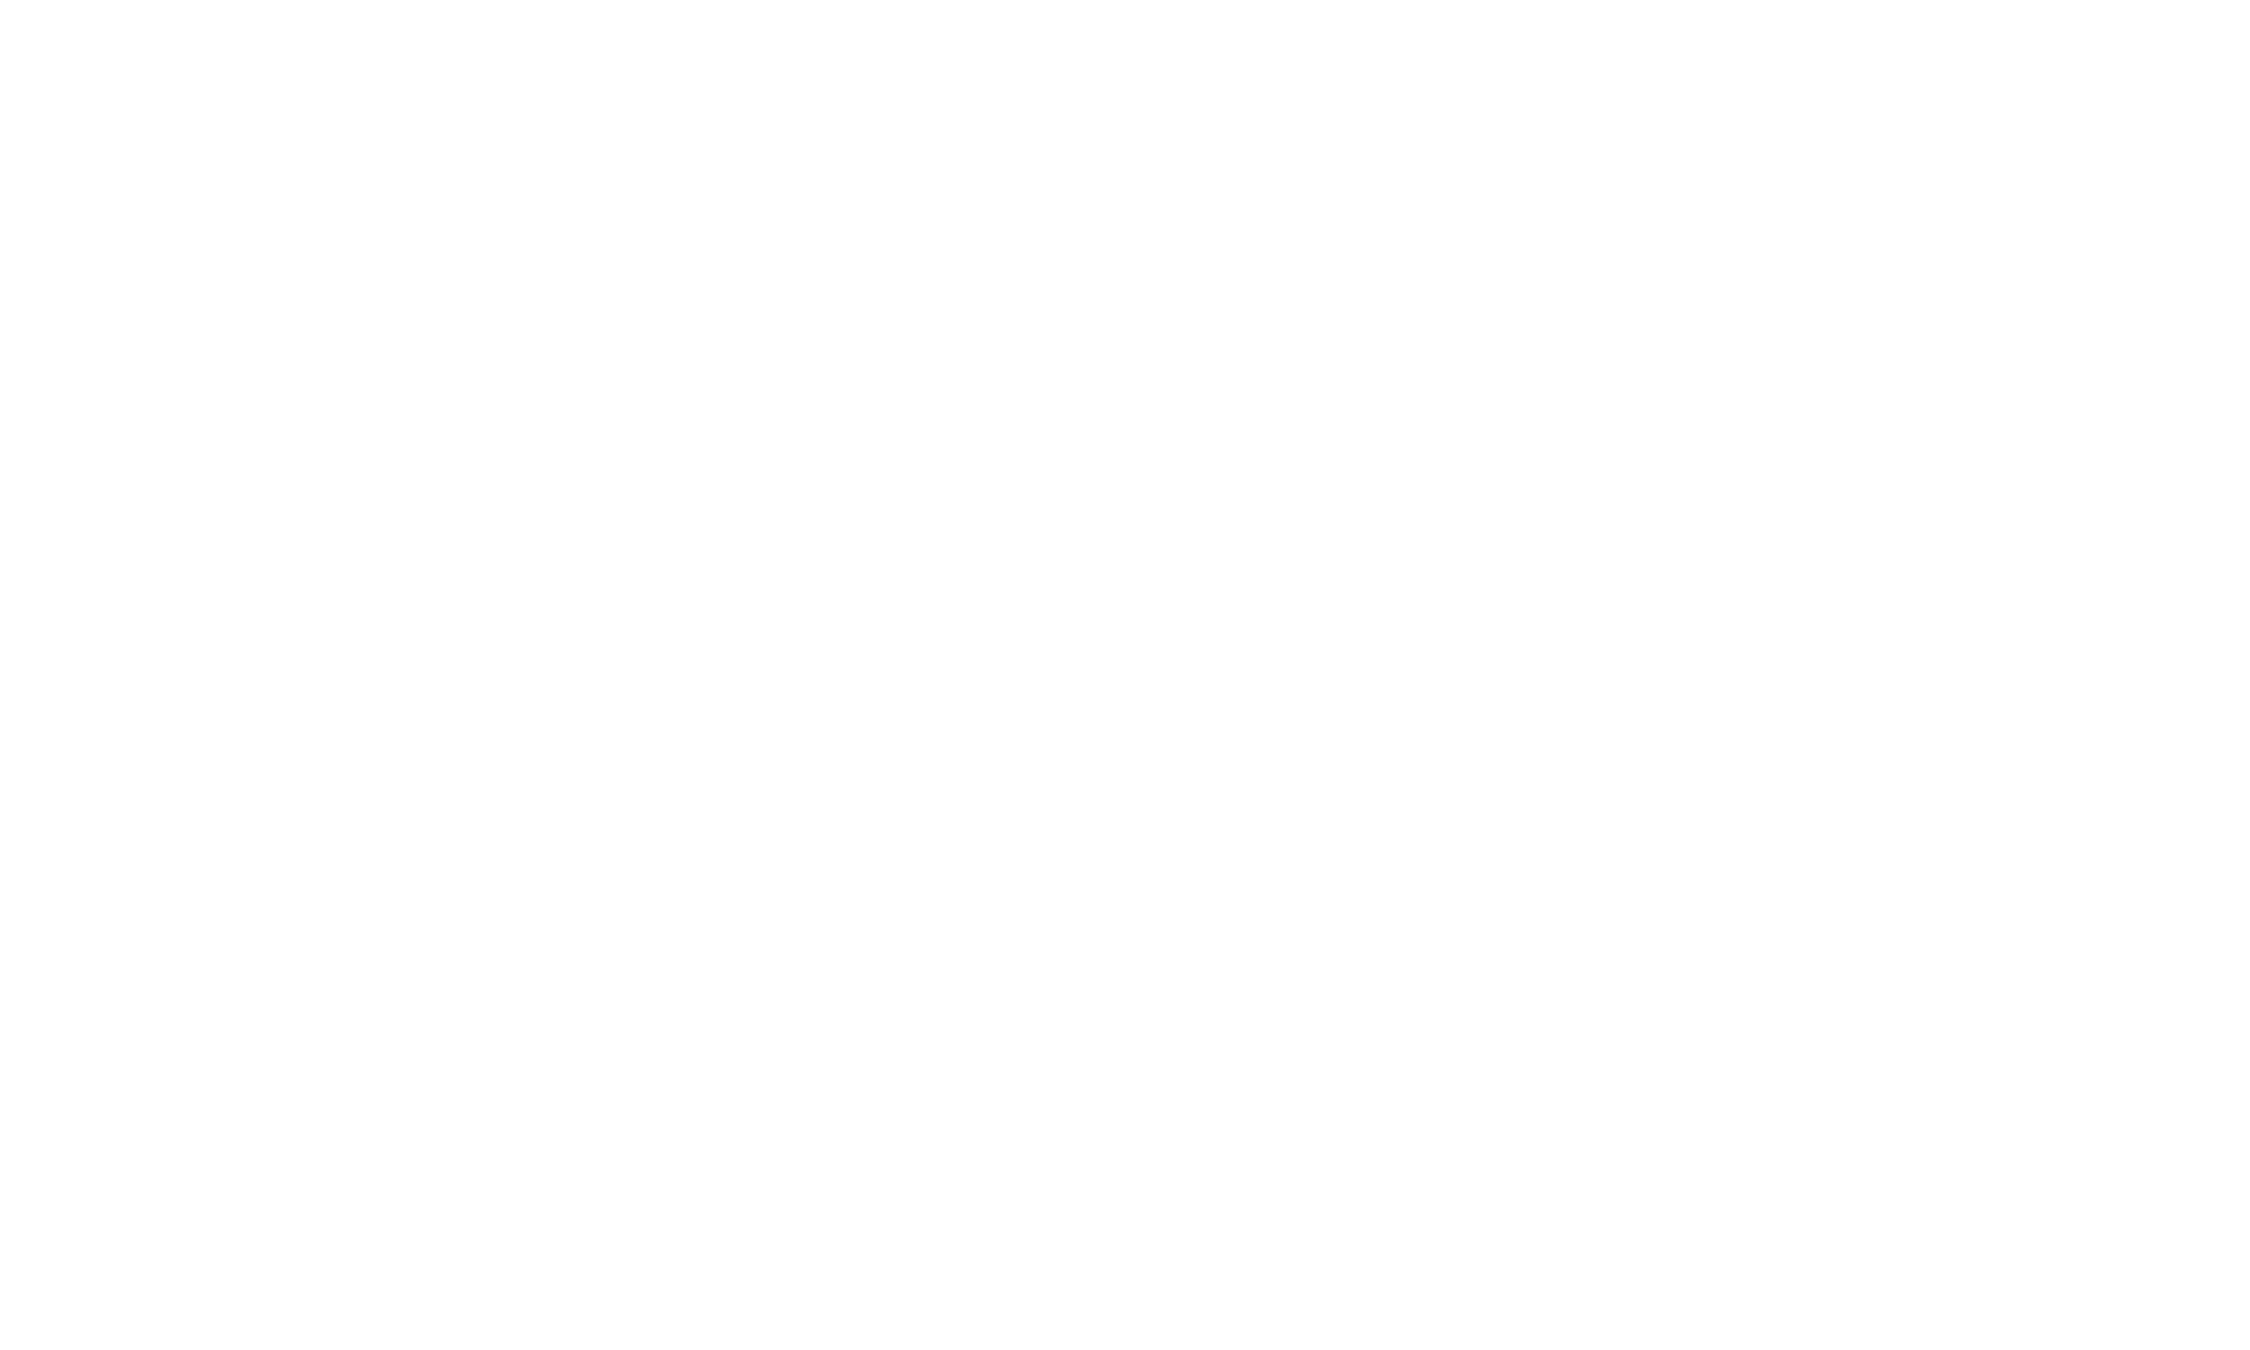

<IPython.core.display.Javascript object>


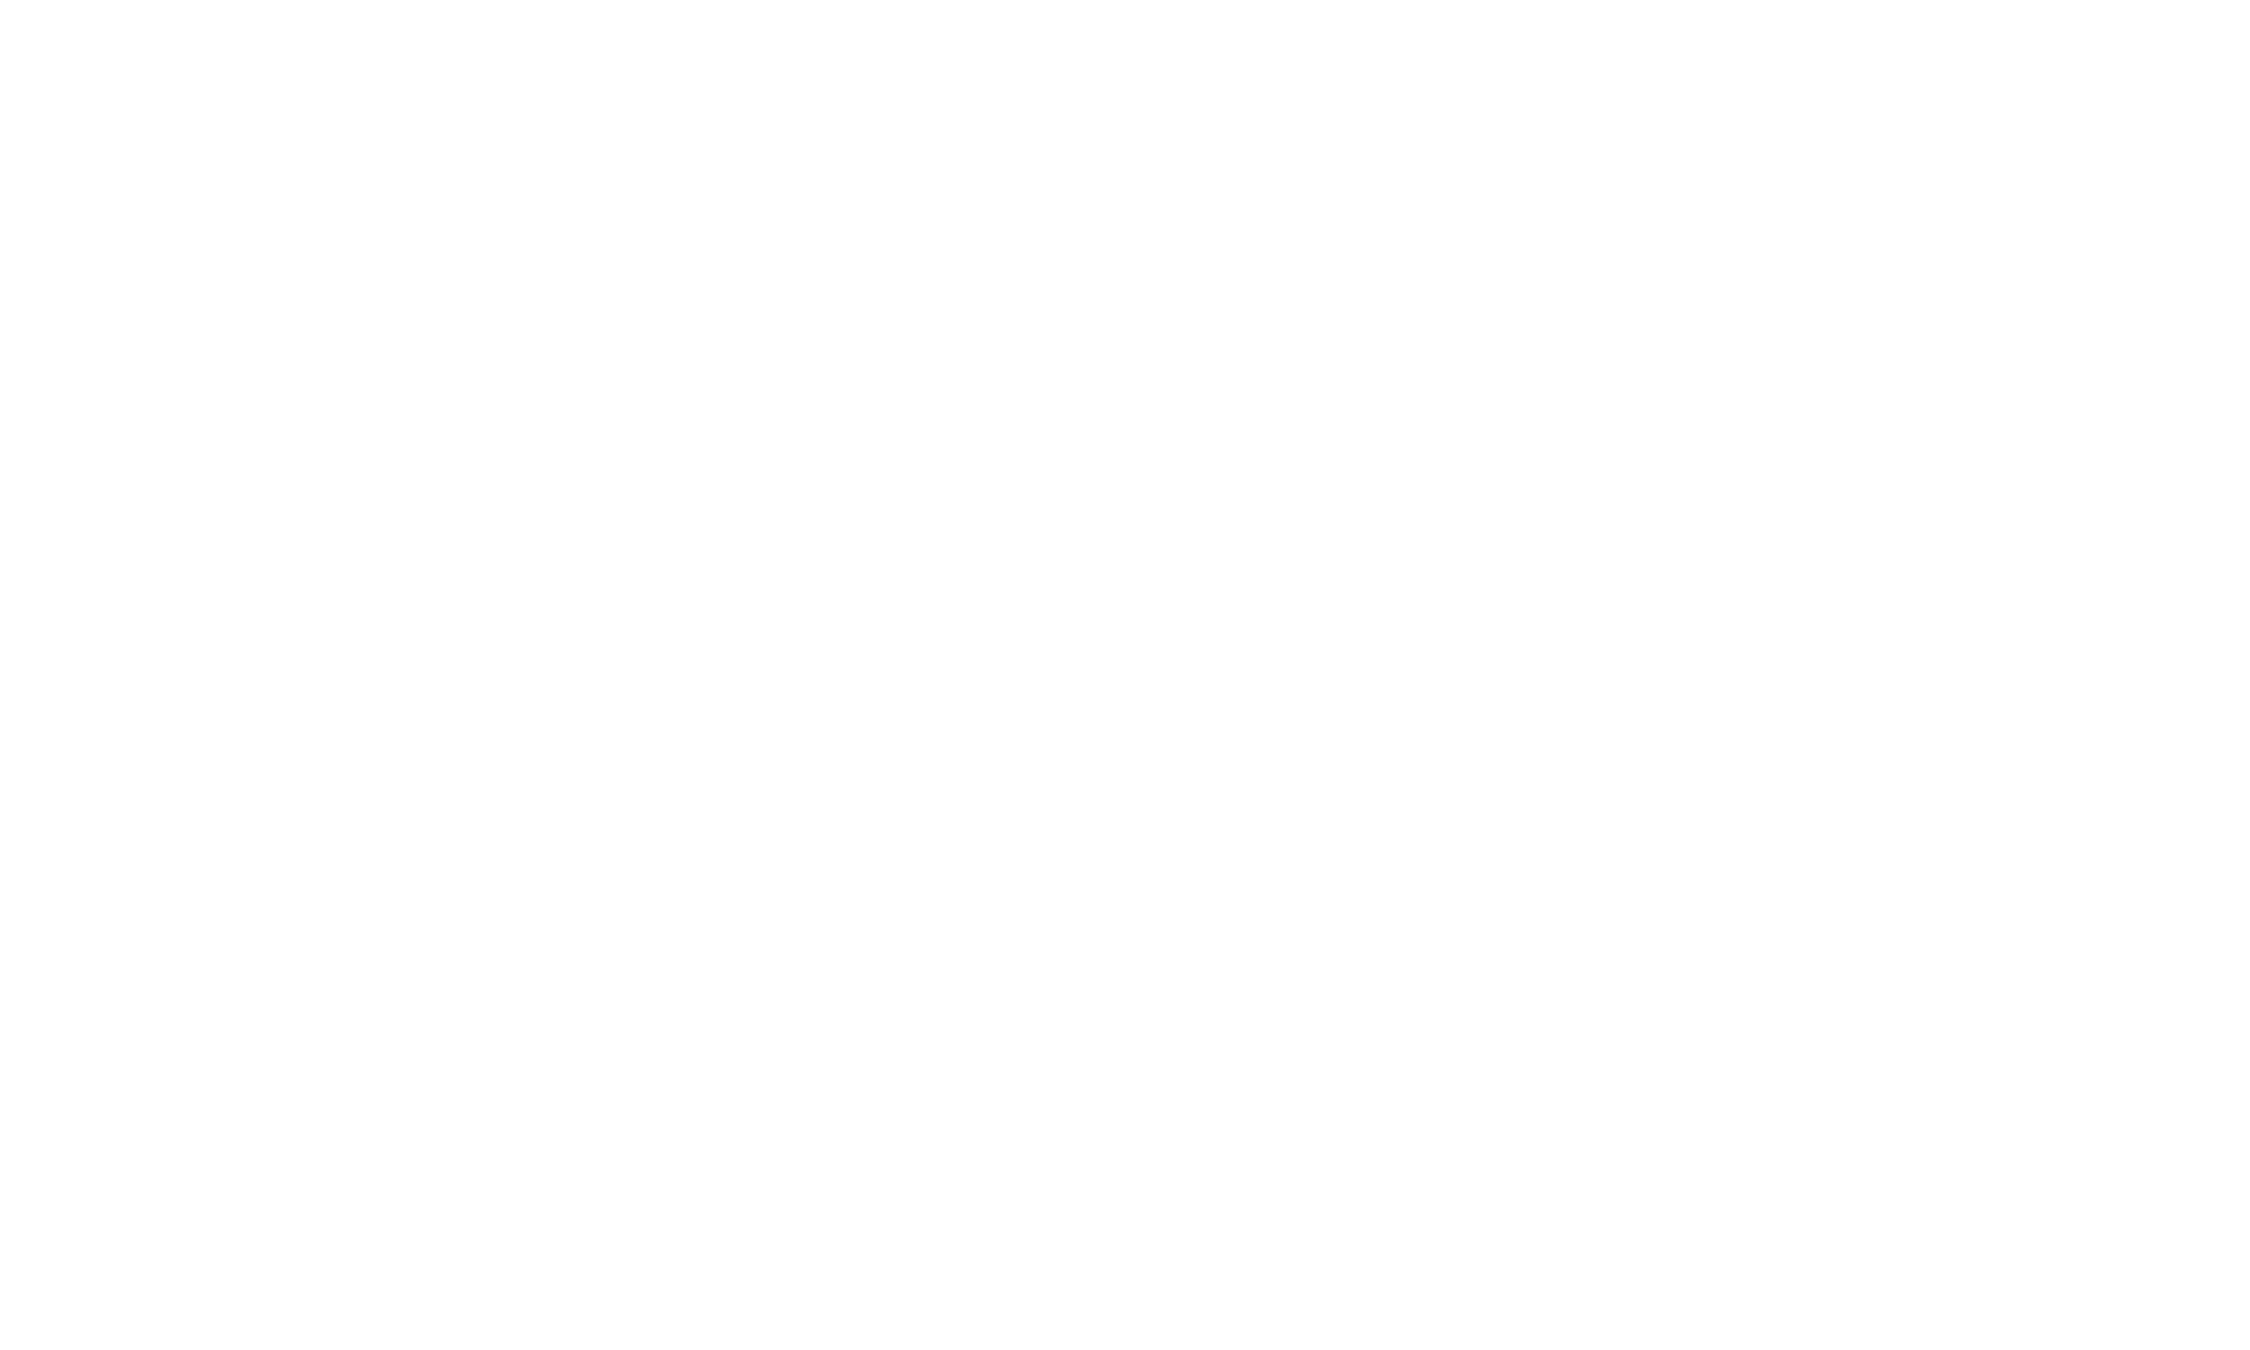

<IPython.core.display.Javascript object>


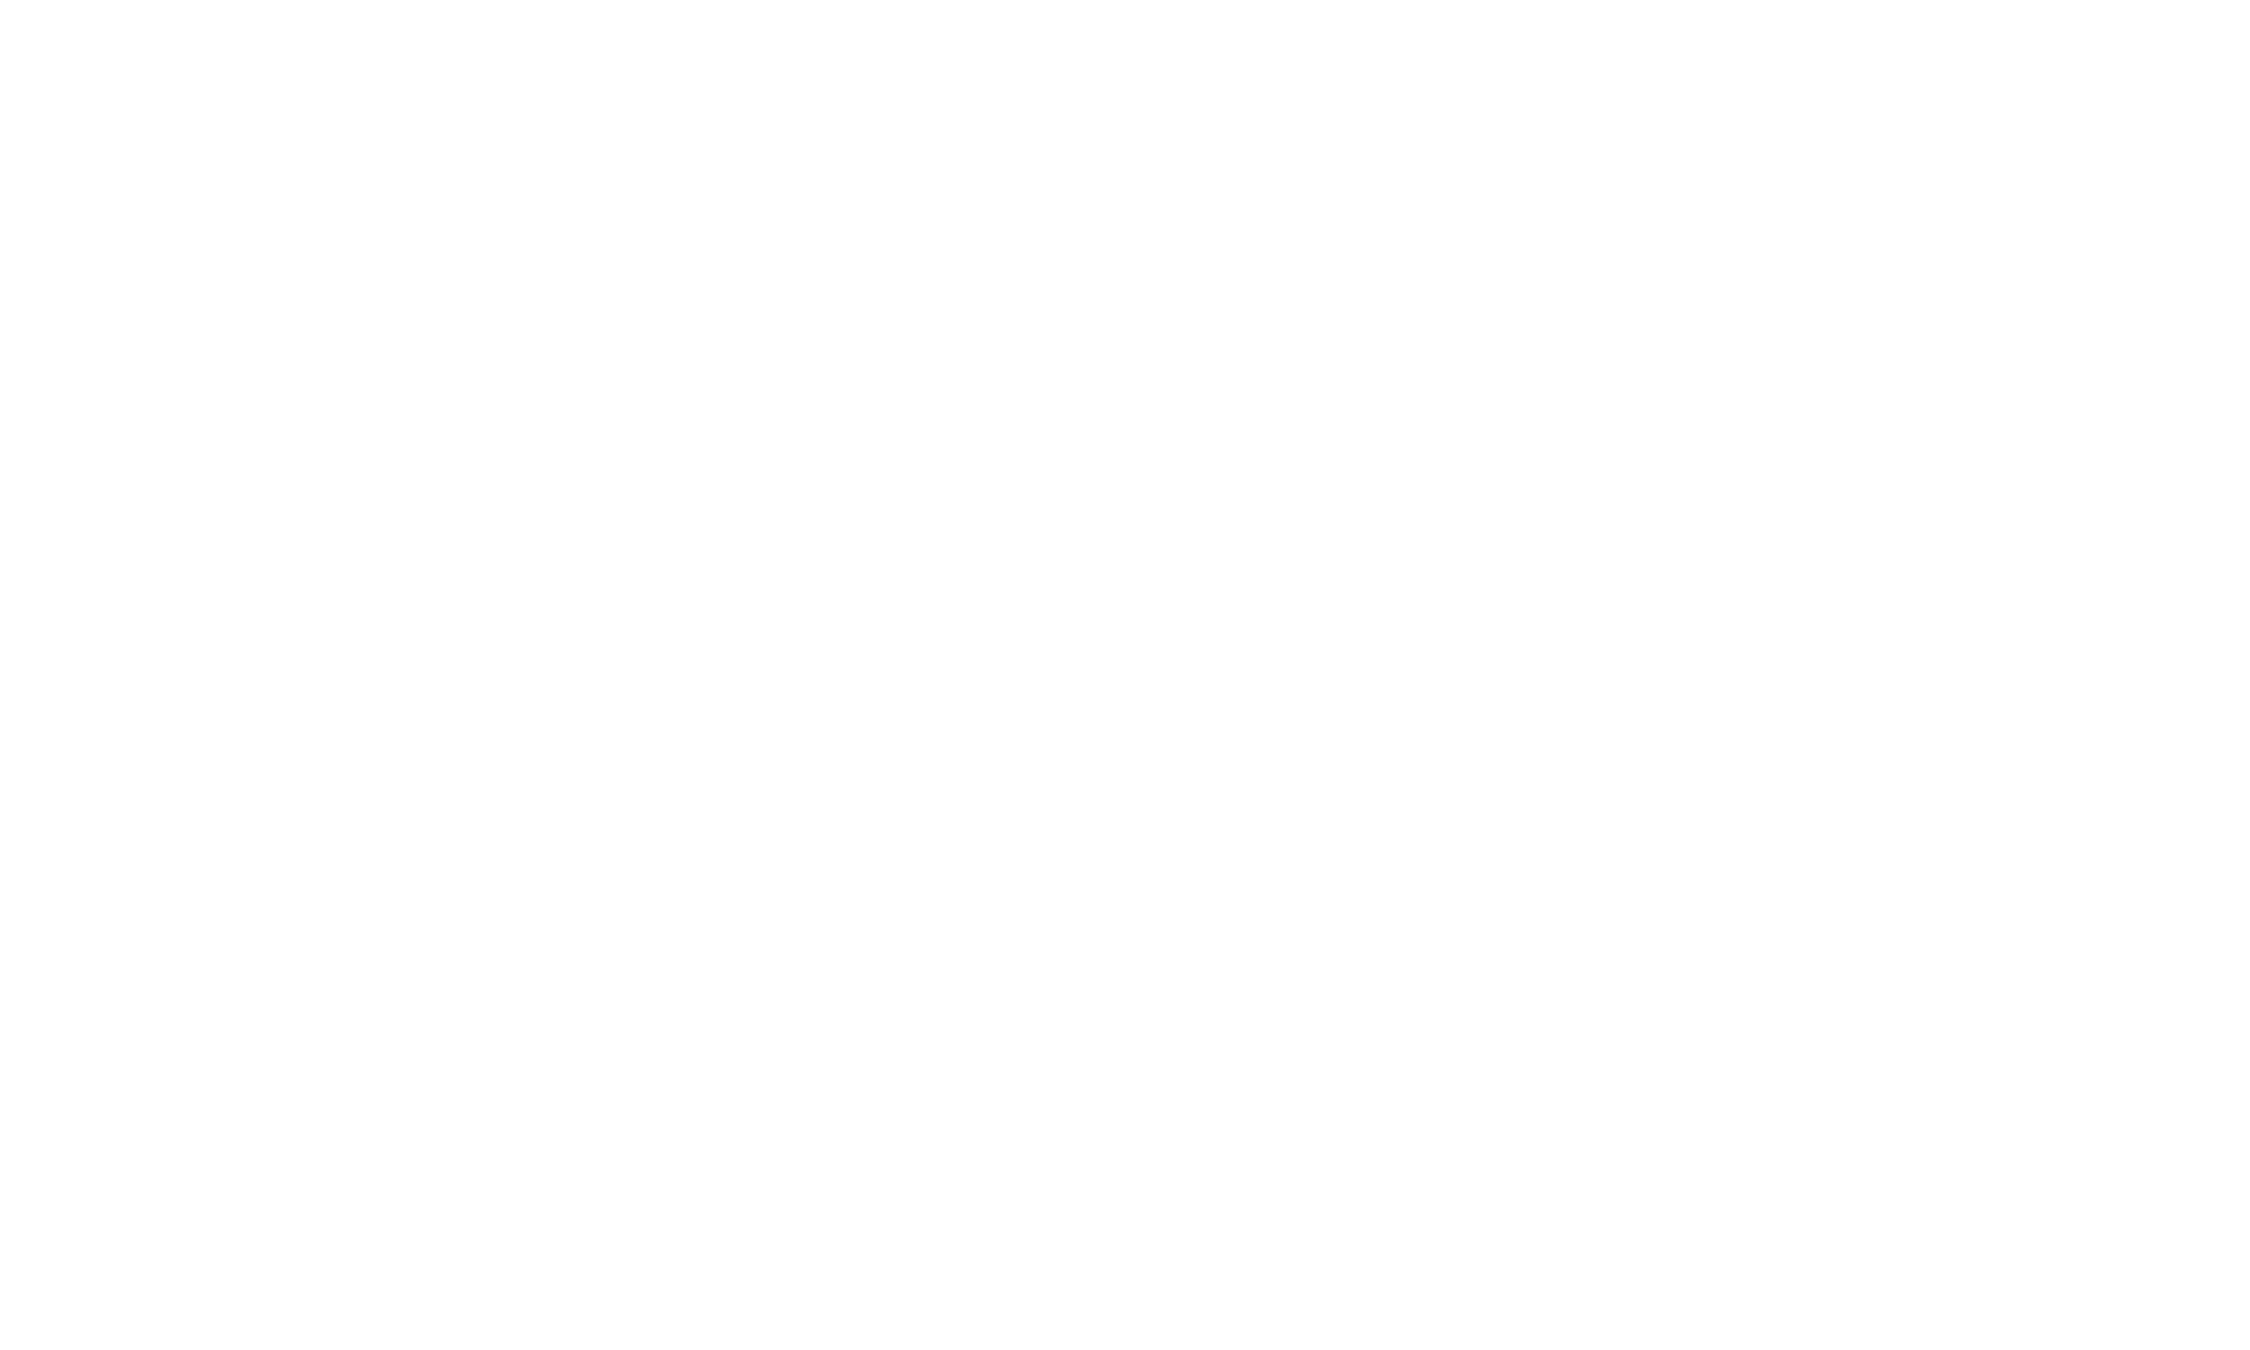

<IPython.core.display.Javascript object>


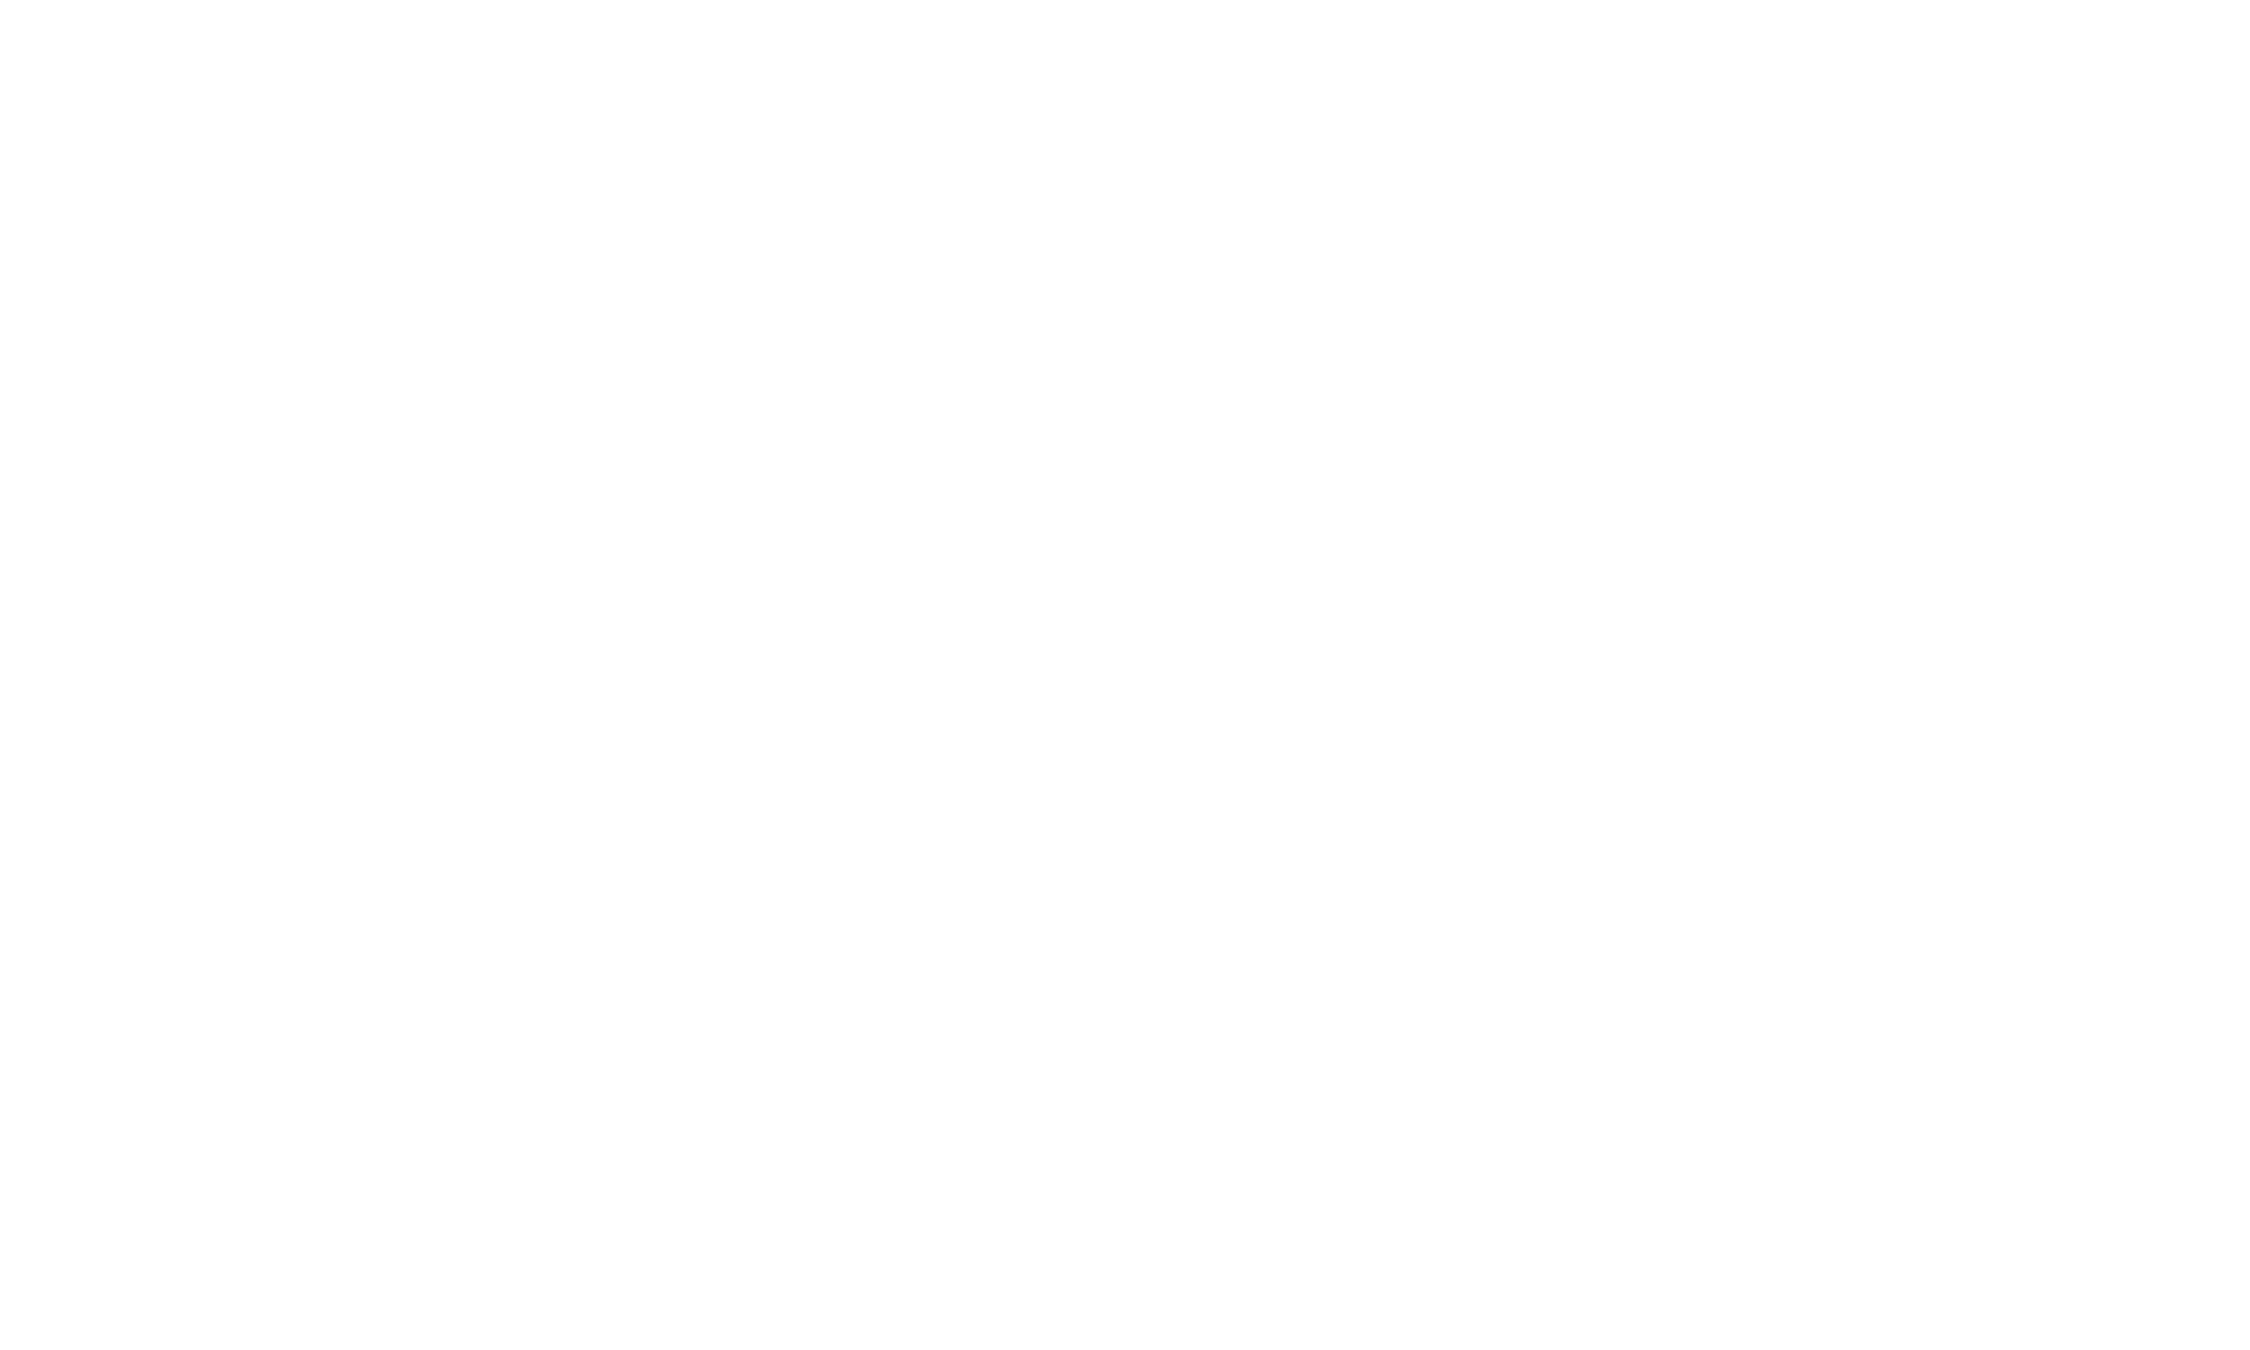

<IPython.core.display.Javascript object>


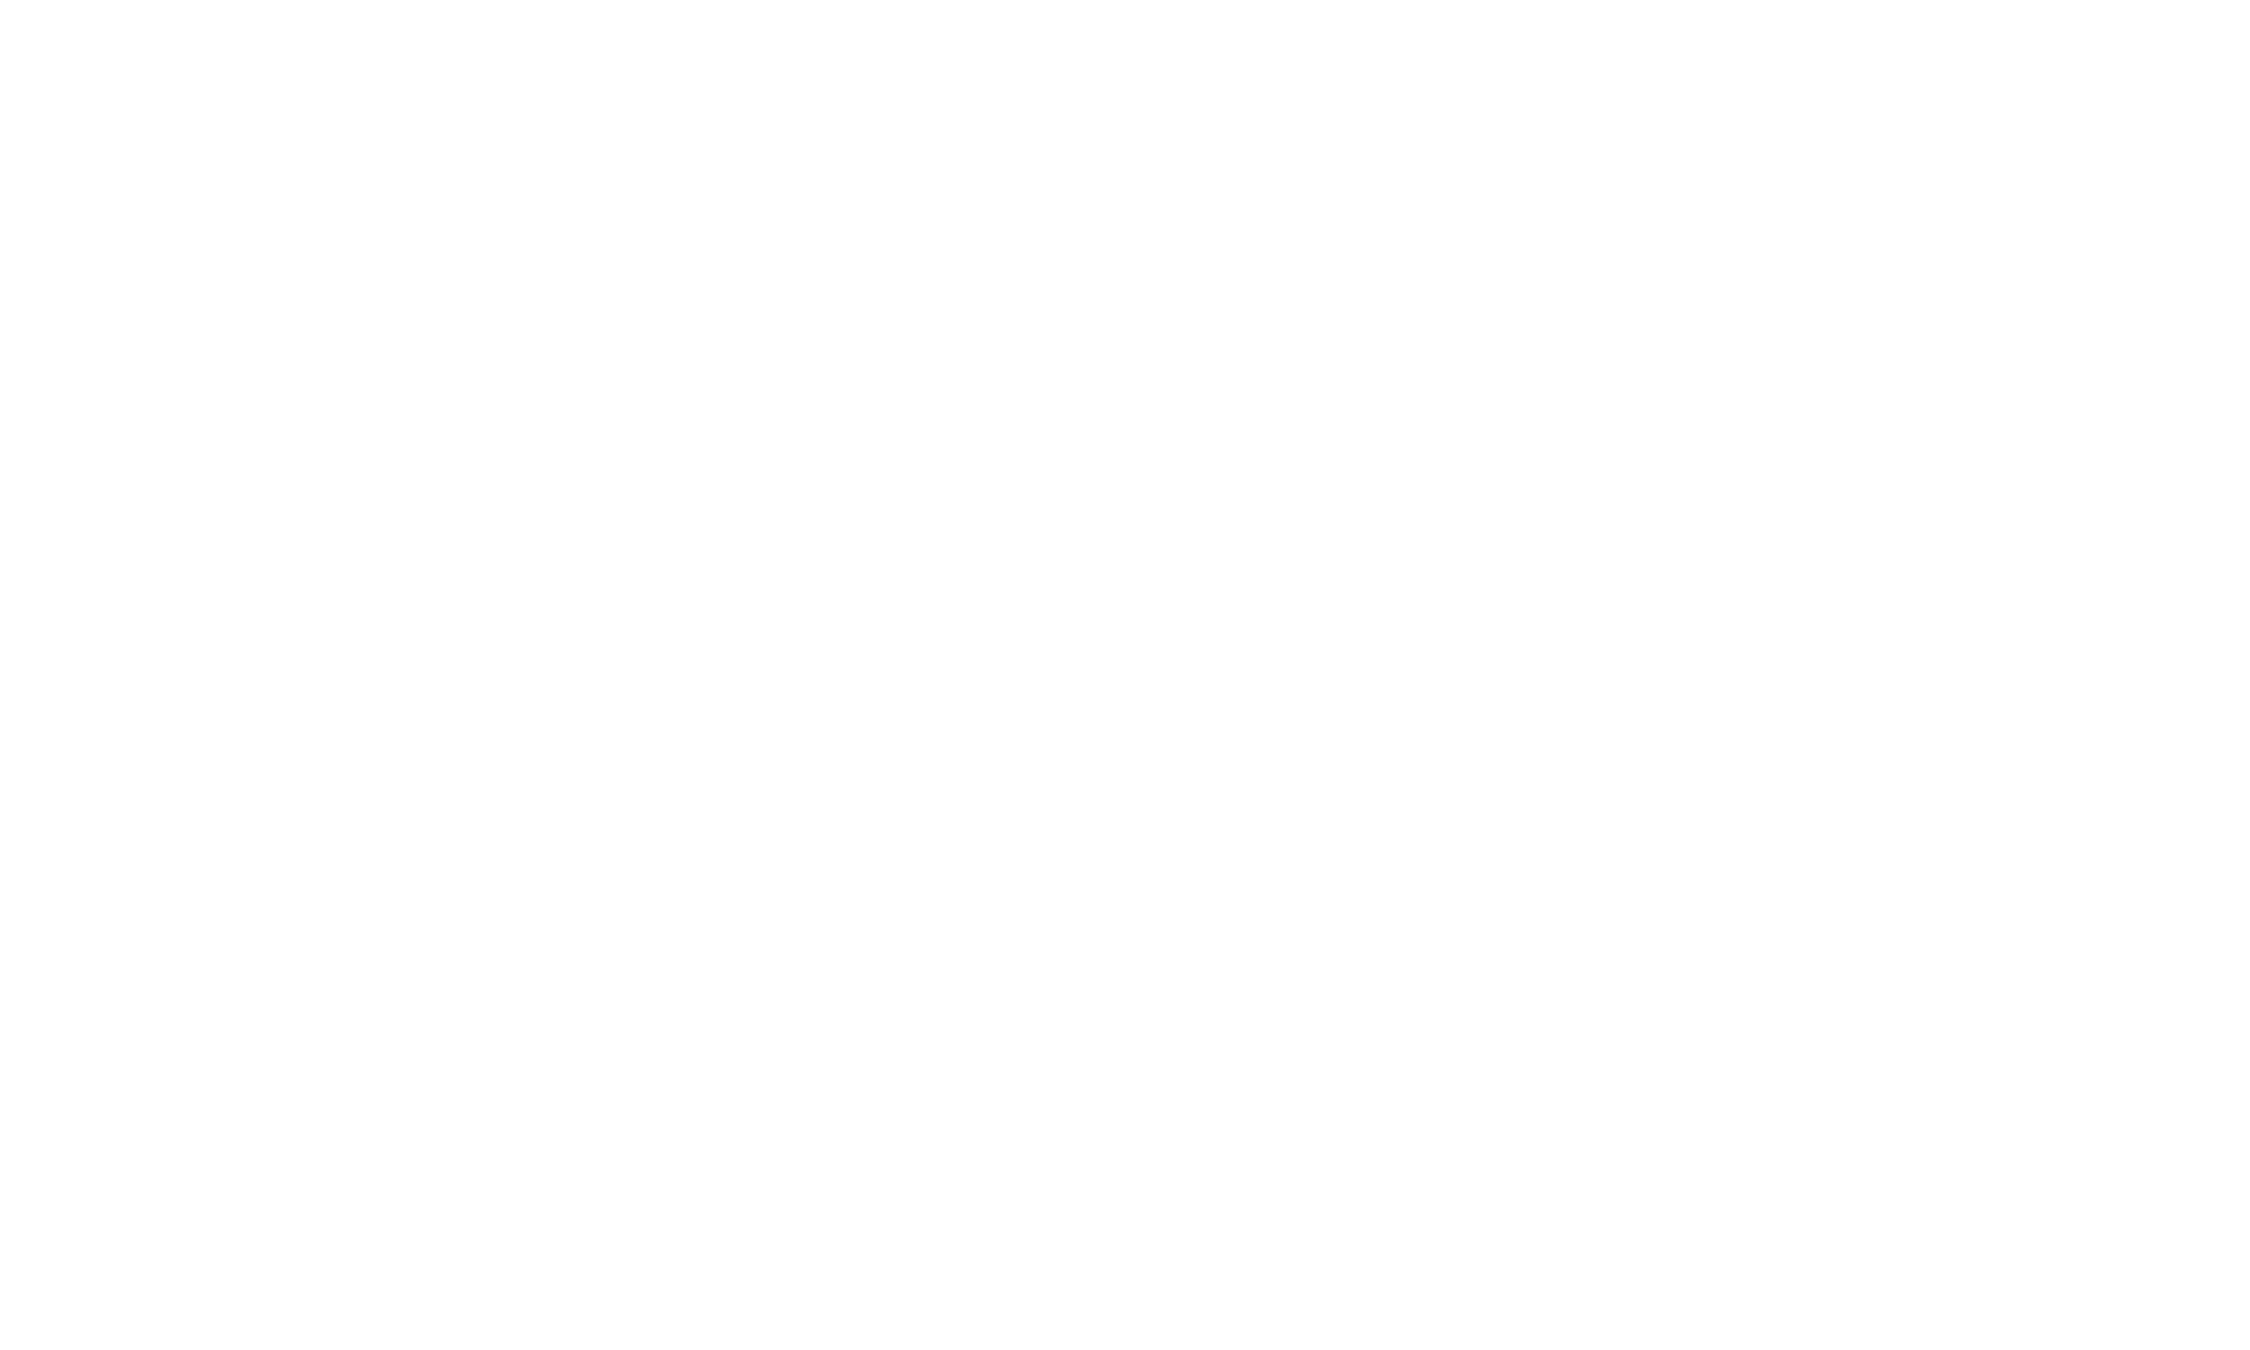

<IPython.core.display.Javascript object>


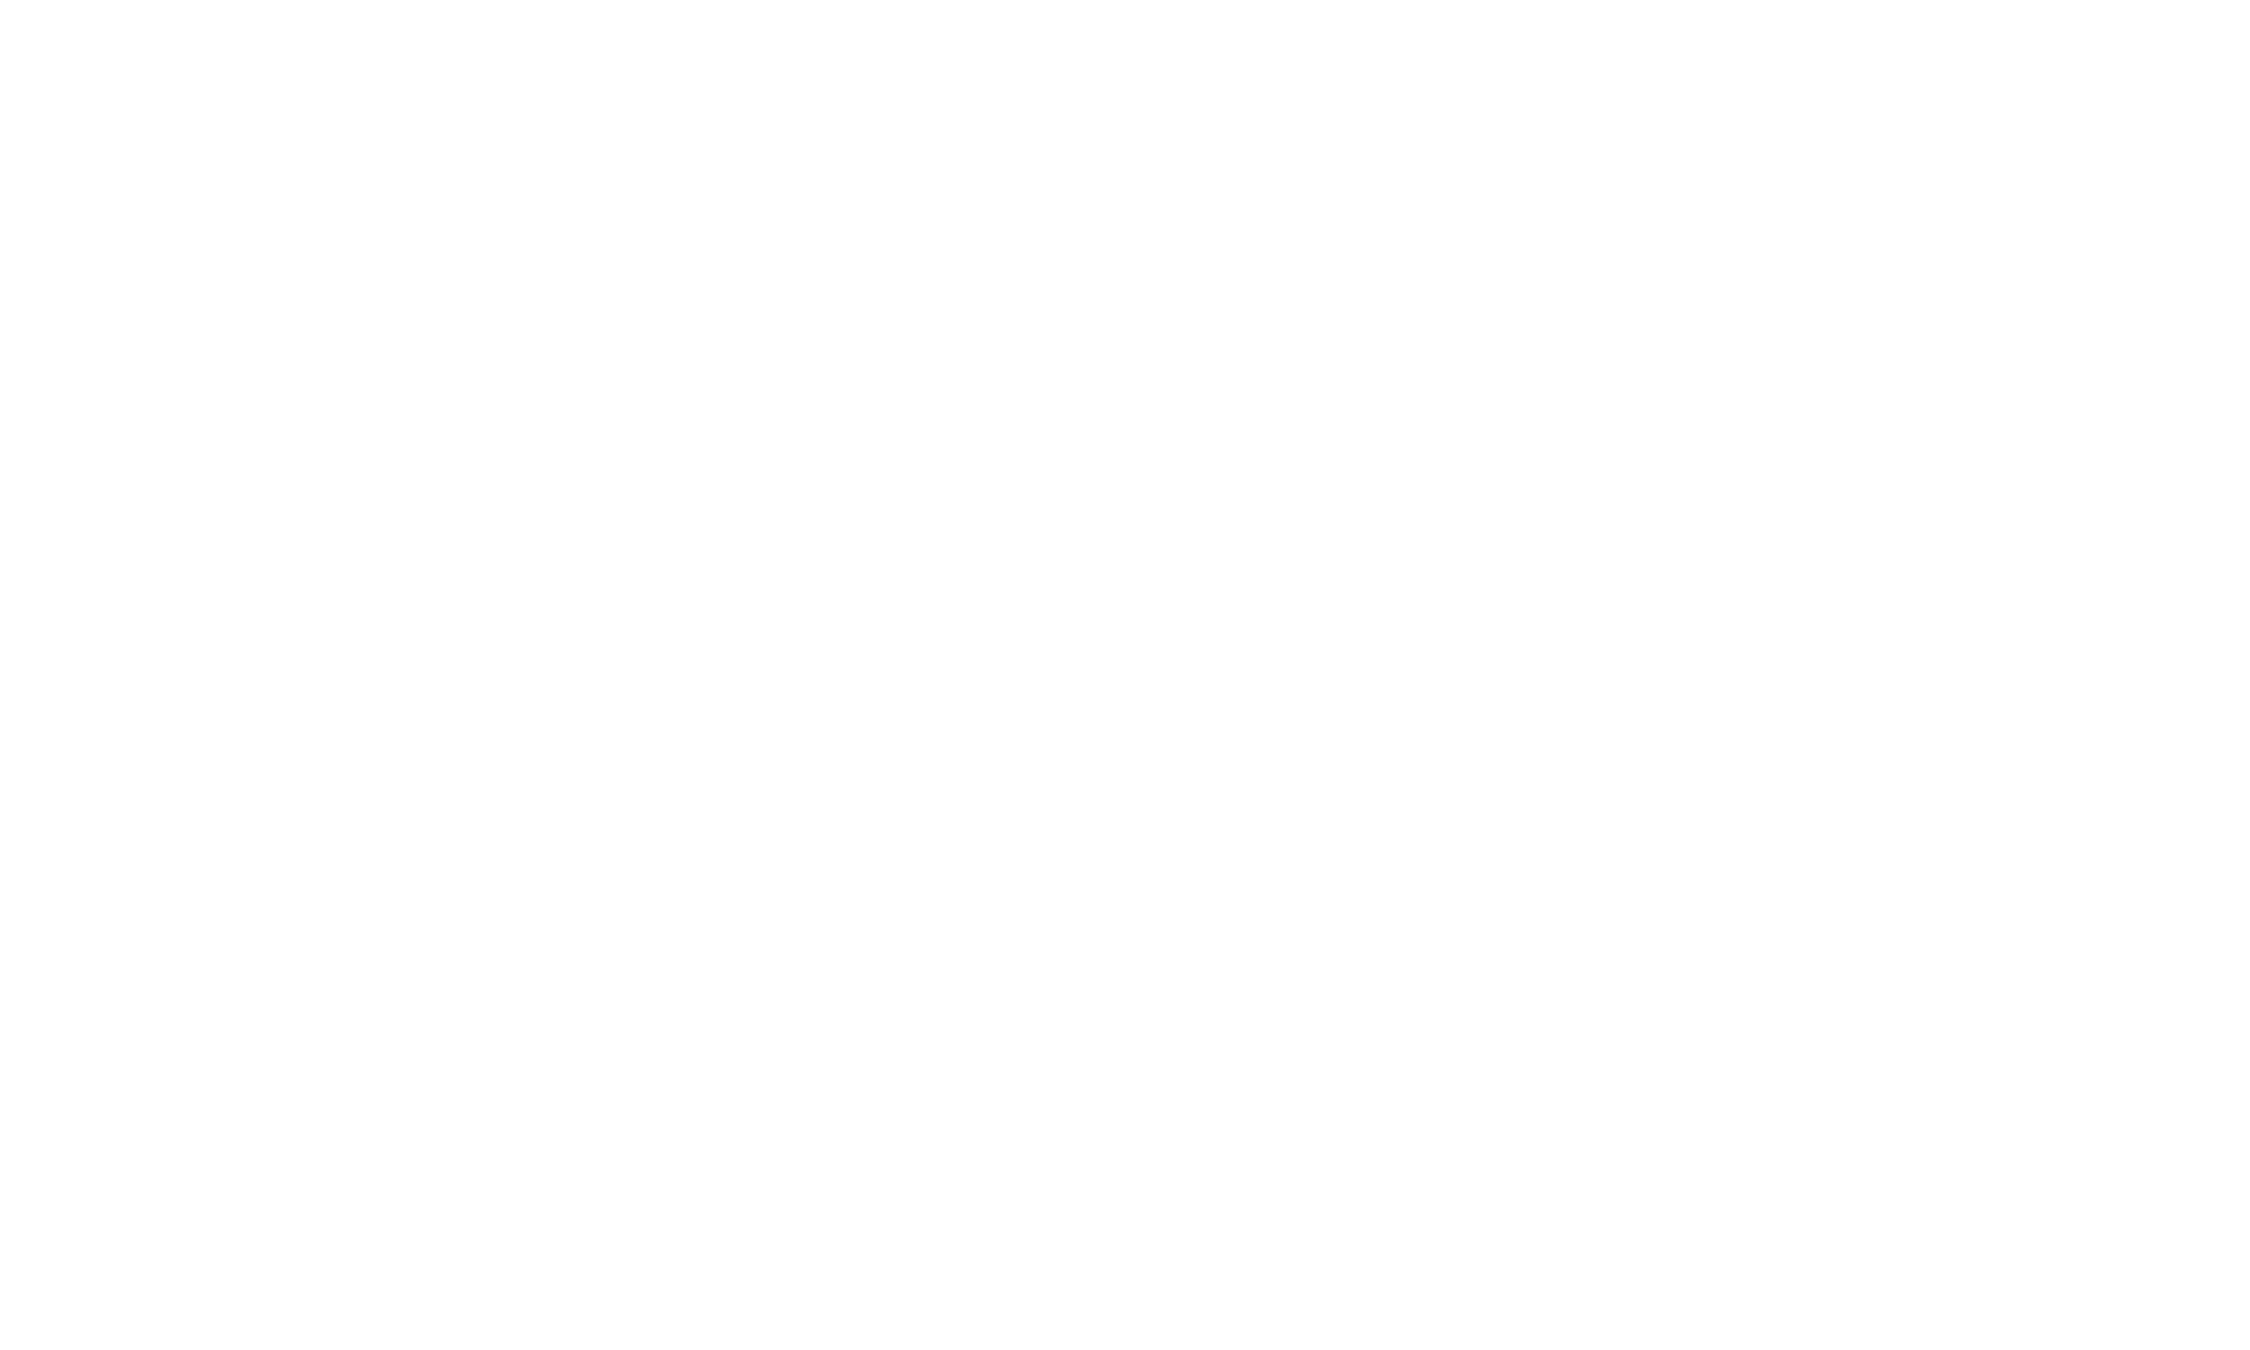

<IPython.core.display.Javascript object>


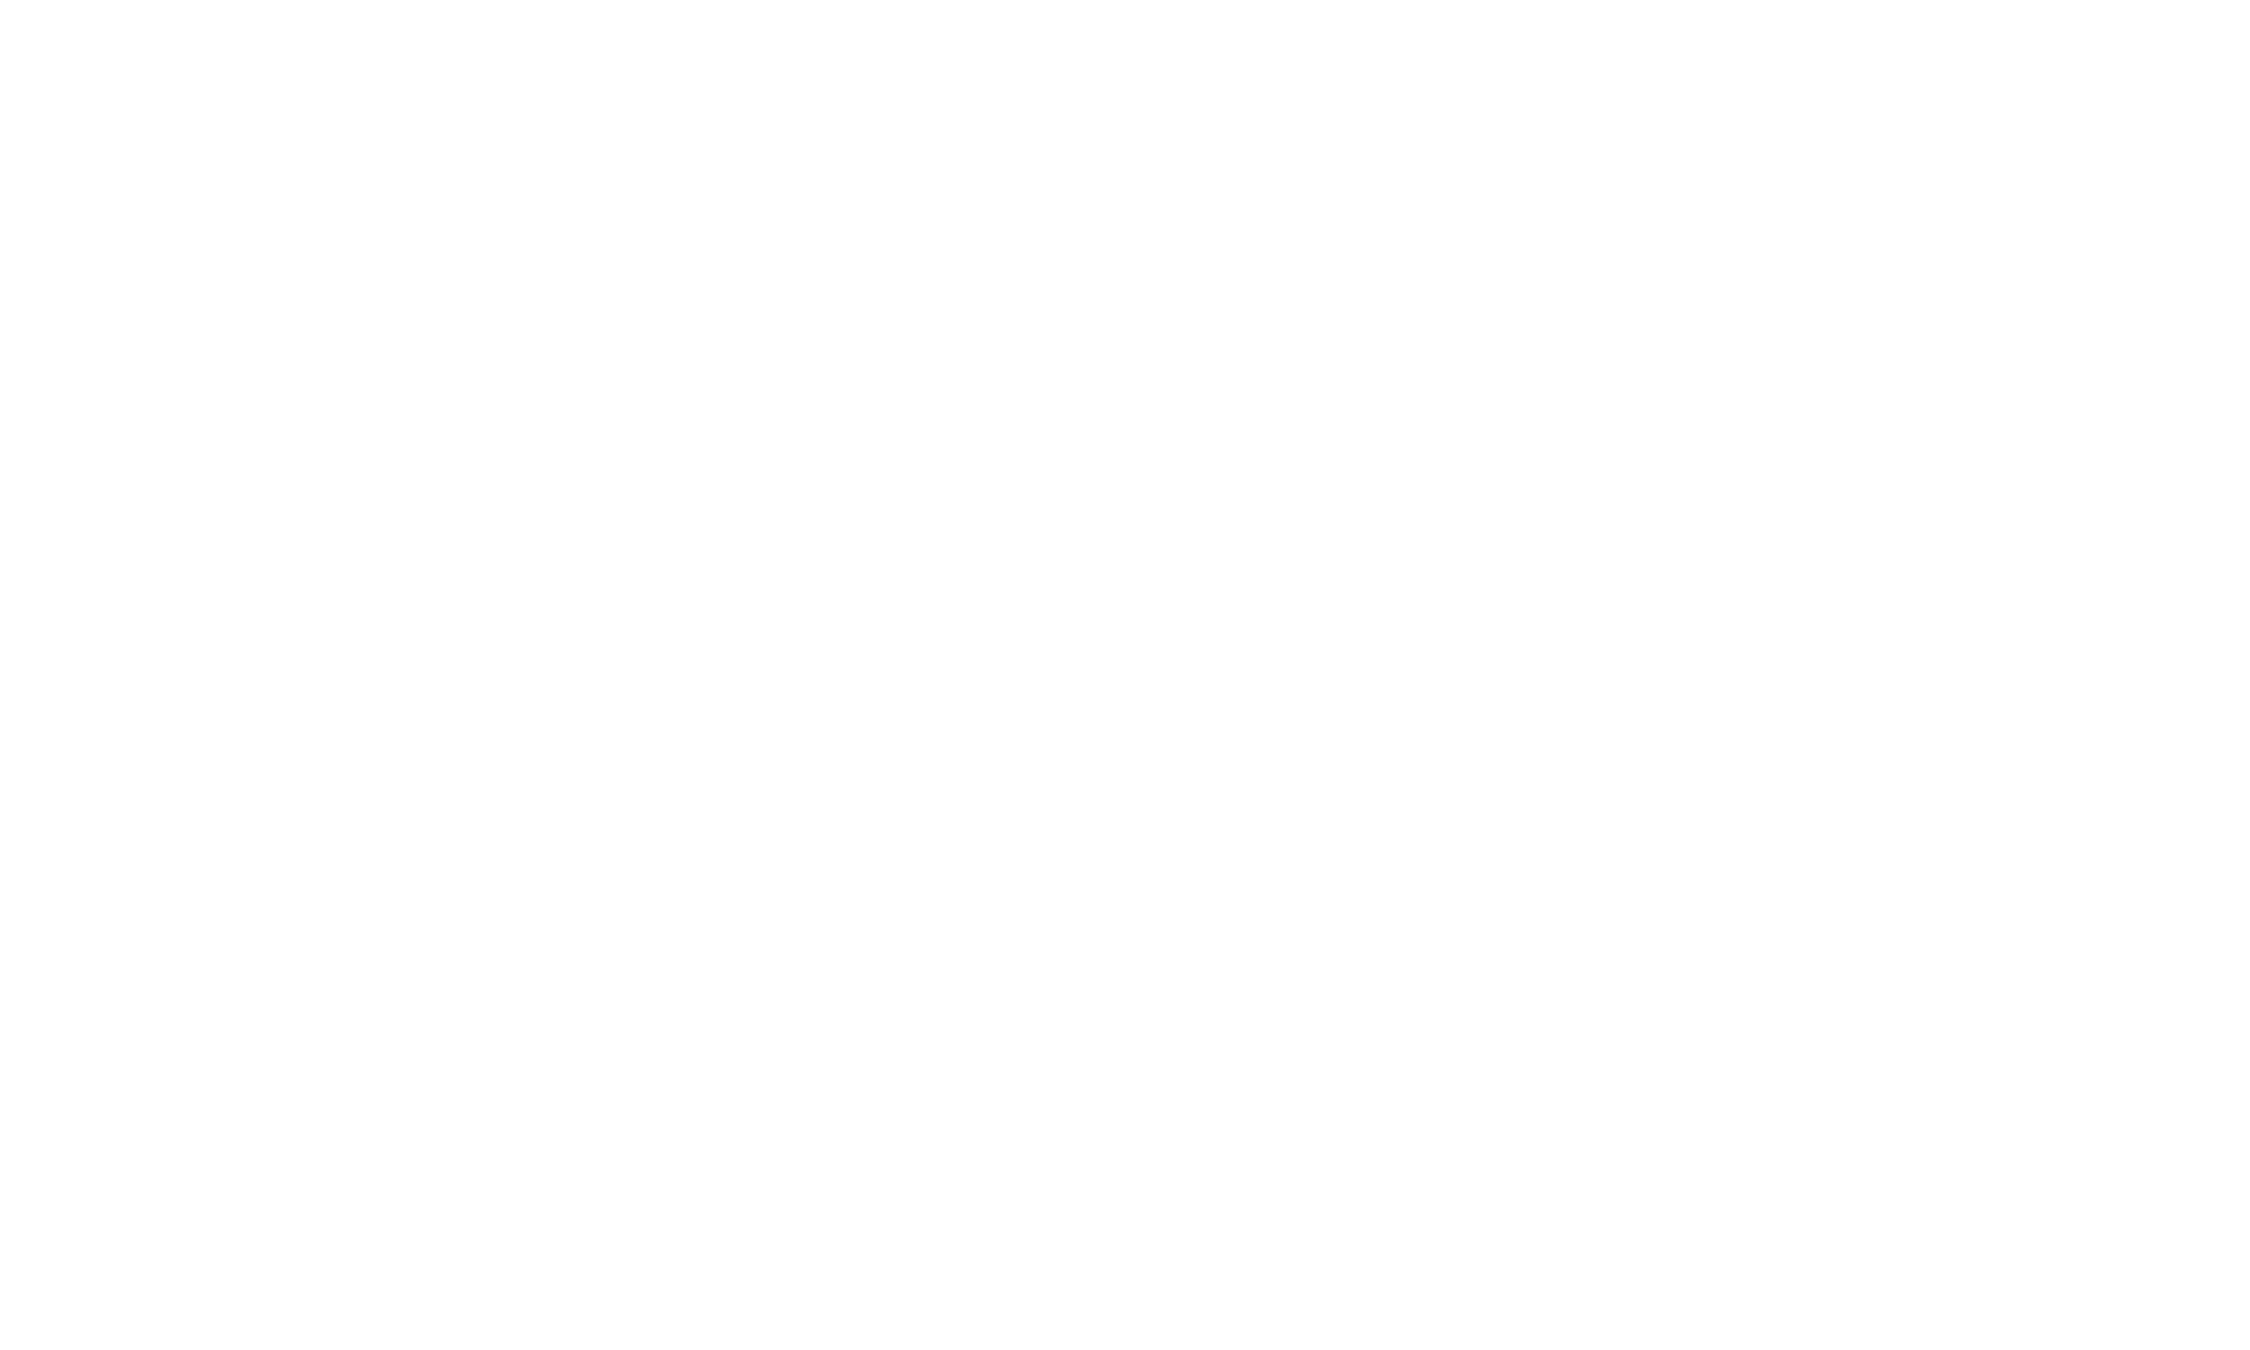

In [132]:
## ON
#L
ls_flash = [60,120,180,240,300,360,420][::-1]
ls_Edges = [12.5,50,100,200,300,500,900]

axshare = 'ShareXY'#'noshare'; 
#datatype = 'AP' # 'AP'
for n in range(7):     
    fig, axes = plt.subplots(3, 5, sharey=True, sharex=True,figsize=(15,9))
    fig.suptitle('On. Flash Duration:%d. Edge Speed:%d. %s' %(ls_flash[n],ls_Edges[n],axshare))
    axes[0, 0].set_title('Flash'); axes[0, 1].set_title('PD'); axes[0, 2].set_title('ND'); axes[0, 3].set_title('Up'); axes[0, 4].set_title('Down')
    axes[0, 0].plot(FlashOnMeanL.iloc[-(1+n),:][2:].values,'k', alpha = 0.8)
    for j in np.where(FlashOnCellL['Angles'] == ls_flash[n])[0]:
        axes[0, 0].plot(FlashOnCellL.iloc[j,:][2:].values, alpha = 0.2)#alpha = 0.2+j*0.1)    

    axes[0, 1].plot(EdgeOnMeanL.iloc[n,:][2:].values,'k', alpha = 0.8)
    axes[0, 2].plot(EdgeOnMeanL.iloc[n+7,:][2:].values,'k', alpha = 0.8)
    for j in np.where(EdgeOnCellL['Angles'] == ls_Edges[n])[0]:
        axes[0, 1].plot(EdgeOnCellL.iloc[j,:][2:].values, alpha = 0.2)#, 'b',alpha = 0.2+j*0.1)
    for j in np.where(EdgeOnCellL['Angles'] == -ls_Edges[n])[0]:
        axes[0, 2].plot(EdgeOnCellL.iloc[j,:][2:].values,alpha = 0.2)#'b',alpha = 0.2+j*0.1)

    axes[0, 3].plot(EdgeOnMeanLv.iloc[n,:][2:].values,'k', alpha = 0.8)
    axes[0, 4].plot(EdgeOnMeanLv.iloc[n+7,:][2:].values,'k', alpha = 0.8)
    for j in np.where(EdgeOnCellLv['Angles'] == ls_Edges[n])[0]:
        axes[0, 3].plot(EdgeOnCellLv.iloc[j,:][2:].values, alpha = 0.2)#alpha = 0.2+j*0.1)
    for j in np.where(EdgeOnCellLv['Angles'] == -ls_Edges[n])[0]:
        axes[0, 4].plot(EdgeOnCellLv.iloc[j,:][2:].values, alpha = 0.2)#,alpha = 0.2+j*0.1)
    axes[0, 0].set_ylabel('L'); 

#R
    axes[1, 0].plot(FlashOnMeanR.iloc[-(1+n),:][2:].values,'k', alpha = 0.8)
    for j in np.where(FlashOnCellR['Angles'] == ls_flash[n])[0]:
        axes[1, 0].plot(FlashOnCellR.iloc[j,:][2:].values, alpha = 0.2)


    axes[1, 1].plot(EdgeOnMeanR.iloc[n,:][2:].values,'k', alpha = 0.8)
    axes[1, 2].plot(EdgeOnMeanR.iloc[n+7,:][2:].values,'k', alpha = 0.8)
    for j in np.where(EdgeOnCellR['Angles'] == ls_Edges[n])[0]:
        axes[1, 1].plot(EdgeOnCellR.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)
    for j in np.where(EdgeOnCellR['Angles'] == -ls_Edges[n])[0]:
        axes[1, 2].plot(EdgeOnCellR.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)


    axes[1, 3].plot(EdgeOnMeanRv.iloc[n,:][2:].values,'k', alpha = 0.8)
    axes[1, 4].plot(EdgeOnMeanRv.iloc[n+7,:][2:].values,'k', alpha = 0.8)
    for j in np.where(EdgeOnCellRv['Angles'] == ls_Edges[n])[0]:
        axes[1, 3].plot(EdgeOnCellRv.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)
    for j in np.where(EdgeOnCellRv['Angles'] == -ls_Edges[n])[0]:
        axes[1, 4].plot(EdgeOnCellRv.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)
    axes[1, 0].set_ylabel('R'); 


#both    
    axes[2, 0].plot(FlashOnMean.iloc[-(1+n),:][2:].values,'k')
    for j in np.where(FlashOnCell['Angles'] == ls_flash[n])[0]:
        axes[2, 0].plot(FlashOnCell.iloc[j,:][2:].values, alpha = 0.2)#alpha = 0.2+j*0.1)    

    axes[2, 1].plot(EdgeOnMean.iloc[n,:][2:].values,'k',alpha = 0.8)    
    axes[2, 2].plot(EdgeOnMean.iloc[n+7,:][2:].values,'k',alpha = 0.8)
    for j in np.where(EdgeOnCell['Angles'] == ls_Edges[n])[0]:
        axes[2, 1].plot(EdgeOnCell.iloc[j,:][2:].values,alpha =0.2)# 'y',alpha = 0.2+j*0.1)
    for j in np.where(EdgeOnCell['Angles'] == -ls_Edges[n])[0]:
        axes[2, 2].plot(EdgeOnCell.iloc[j,:][2:].values, alpha= 0.2)  # 'y',alpha = 0.2+j*0.1)
    
    
    axes[2, 3].plot(EdgeOnMeanv.iloc[n,:][2:].values,'k', alpha = 0.8)
    axes[2, 4].plot(EdgeOnMeanv.iloc[n+7,:][2:].values,'k', alpha = 0.8)
    for j in np.where(EdgeOnCellv['Angles'] == ls_Edges[n])[0]:
        axes[2, 3].plot(EdgeOnCellv.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)
    for j in np.where(EdgeOnCellv['Angles'] == -ls_Edges[n])[0]:
        axes[2, 4].plot(EdgeOnCellv.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)
    axes[2, 0].set_ylabel('Both'); 
    
#Vlines
    axes[0,0].axvline(x=1/0.05,color = 'R',ls = ':')
    axes[0,0].axvline(x=sum(~np.isnan(FlashOnMeanL.iloc[-(1+n),2:]))-1/0.05,color = 'R',ls = ':') 
    axes[1,0].axvline(x=1/0.05,color = 'R',ls = ':')
    axes[1,0].axvline(x=sum(~np.isnan(FlashOnMeanR.iloc[-(1+n),2:]))-1/0.05,color = 'R',ls = ':')
    #axes[1,0].axvline(x=sum(~np.isnan(FlashOnMeanR.iloc[-(1+n),2:]))/2,color = 'g',ls = ':') 
    axes[2,0].axvline(x=1/0.05,color = 'R',ls = ':')
    axes[2,0].axvline(x=sum(~np.isnan(FlashOnMean.iloc[-(1+n),2:]))-1/0.05,color = 'R',ls = ':')
    #axes[2,0].axvline(x=sum(~np.isnan(FlashOnMean.iloc[-(1+n),2:]))/2,color = 'g',ls = ':')     

    axes[0,1].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[0,1].axvline(x=sum(~np.isnan(EdgeOnMeanL.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[0,1].axvline(x=sum(~np.isnan(EdgeOnMeanL.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[1,1].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[1,1].axvline(x=sum(~np.isnan(EdgeOnMeanR.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[1,1].axvline(x=sum(~np.isnan(EdgeOnMeanR.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[2,1].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[2,1].axvline(x=sum(~np.isnan(EdgeOnMean.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[2,1].axvline(x=sum(~np.isnan(EdgeOnMean.iloc[n,2:]))/2,color = 'g',ls = ':')

    axes[0,2].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[0,2].axvline(x=sum(~np.isnan(EdgeOnMeanL.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':') 
    axes[0,2].axvline(x=sum(~np.isnan(EdgeOnMeanL.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[1,2].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[1,2].axvline(x=sum(~np.isnan(EdgeOnMeanR.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[1,2].axvline(x=sum(~np.isnan(EdgeOnMeanR.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[2,2].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[2,2].axvline(x=sum(~np.isnan(EdgeOnMean.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')  
    axes[2,2].axvline(x=sum(~np.isnan(EdgeOnMean.iloc[n,2:]))/2,color = 'g',ls = ':')

    axes[0,3].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[0,3].axvline(x=sum(~np.isnan(EdgeOnMeanLv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':') 
    axes[0,3].axvline(x=sum(~np.isnan(EdgeOnMeanLv.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[1,3].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[1,3].axvline(x=sum(~np.isnan(EdgeOnMeanRv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[1,3].axvline(x=sum(~np.isnan(EdgeOnMeanRv.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[2,3].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[2,3].axvline(x=sum(~np.isnan(EdgeOnMeanv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')  
    axes[2,3].axvline(x=sum(~np.isnan(EdgeOnMeanv.iloc[n,2:]))/2,color = 'g',ls = ':')
   
    axes[0,4].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[0,4].axvline(x=sum(~np.isnan(EdgeOnMeanLv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':') 
    axes[0,4].axvline(x=sum(~np.isnan(EdgeOnMeanLv.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[1,4].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[1,4].axvline(x=sum(~np.isnan(EdgeOnMeanRv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[1,4].axvline(x=sum(~np.isnan(EdgeOnMeanRv.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[2,4].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[2,4].axvline(x=sum(~np.isnan(EdgeOnMeanv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')  
    axes[2,4].axvline(x=sum(~np.isnan(EdgeOnMeanv.iloc[n,2:]))/2,color = 'g',ls = ':')

    #plt.xticks(axes[0,0].get_xticks(),axes[0,0].get_xticks()*0.05)
    axes[0,0].set_xticklabels(axes[0,0].get_xticks()*0.05)
    axes[0,1].set_xticklabels(axes[0,1].get_xticks()*0.05)
    axes[0,2].set_xticklabels(axes[0,2].get_xticks()*0.05)
    axes[0,3].set_xticklabels(axes[0,3].get_xticks()*0.05)
    axes[0,4].set_xticklabels(axes[0,4].get_xticks()*0.05)
    axes[1,0].set_xticklabels(axes[1,0].get_xticks()*0.05)
    axes[1,1].set_xticklabels(axes[1,1].get_xticks()*0.05)
    axes[1,2].set_xticklabels(axes[1,2].get_xticks()*0.05)
    axes[1,3].set_xticklabels(axes[1,3].get_xticks()*0.05)
    axes[1,4].set_xticklabels(axes[1,4].get_xticks()*0.05)
    axes[2,0].set_xticklabels(axes[2,0].get_xticks()*0.05)
    axes[2,1].set_xticklabels(axes[2,1].get_xticks()*0.05)
    axes[2,2].set_xticklabels(axes[2,2].get_xticks()*0.05)   
    
    #axes[2,0].set_ylim(-45,-30)
    plt.savefig(csvroot+'Pics/On_%d_%d_%s_%s.png' %(ls_flash[n],ls_Edges[n],axshare, datatype))
    plt.close()

In [27]:
## Off
#L
ls_flash = [60,120,180,240,300,360,420][::-1]
ls_Edges = [12.5,50,100,200,300,500,900]

#axshare = 'NoShare'
#datatype = 'Vm' # 'AP'

for n in range(7):     
    fig, axes = plt.subplots(3, 5, sharey=True, sharex=True,figsize=(15,9))
    fig.suptitle('Off. Flash Duration:%d. Edge Speed:%d. %s' %(ls_flash[n],ls_Edges[n], axshare))
    axes[0, 0].set_title('Flash'); axes[0, 1].set_title('PD'); axes[0, 2].set_title('ND'); axes[0, 3].set_title('Up'); axes[0, 4].set_title('Down')
    axes[0, 0].plot(FlashOffMeanL.iloc[-(1+n),:][2:].values,'k', alpha = 0.8)
    for j in np.where(FlashOffCellL['Angles'] == ls_flash[n])[0]:
        axes[0, 0].plot(FlashOffCellL.iloc[j,:][2:].values, alpha = 0.2)#alpha = 0.2+j*0.1)    

    axes[0, 1].plot(EdgeOffMeanL.iloc[n,:][2:].values,'k', alpha = 0.8)
    axes[0, 2].plot(EdgeOffMeanL.iloc[n+7,:][2:].values,'k', alpha = 0.8)
    for j in np.where(EdgeOffCellL['Angles'] == ls_Edges[n])[0]:
        axes[0, 1].plot(EdgeOffCellL.iloc[j,:][2:].values, alpha = 0.2)#, 'b',alpha = 0.2+j*0.1)
    for j in np.where(EdgeOffCellL['Angles'] == -ls_Edges[n])[0]:
        axes[0, 2].plot(EdgeOffCellL.iloc[j,:][2:].values,alpha = 0.2)#'b',alpha = 0.2+j*0.1)
    
    axes[0, 3].plot(EdgeOffMeanLv.iloc[n,:][2:].values,'k', alpha = 0.8)
    axes[0, 4].plot(EdgeOffMeanLv.iloc[n+7,:][2:].values,'k', alpha = 0.8)
    for j in np.where(EdgeOffCellLv['Angles'] == ls_Edges[n])[0]:
        axes[0, 3].plot(EdgeOffCellLv.iloc[j,:][2:].values, alpha = 0.2)#alpha = 0.2+j*0.1)
    for j in np.where(EdgeOffCellLv['Angles'] == -ls_Edges[n])[0]:
        axes[0, 4].plot(EdgeOffCellLv.iloc[j,:][2:].values, alpha = 0.2)#,alpha = 0.2+j*0.1)
    axes[0, 0].set_ylabel('L'); 

#R
    axes[1, 0].plot(FlashOffMeanR.iloc[-(1+n),:][2:].values,'k', alpha = 0.8)
    for j in np.where(FlashOffCellR['Angles'] == ls_flash[n])[0]:
        axes[1, 0].plot(FlashOffCellR.iloc[j,:][2:].values, alpha = 0.2)


    axes[1, 1].plot(EdgeOffMeanR.iloc[n,:][2:].values,'k', alpha = 0.8)
    axes[1, 2].plot(EdgeOffMeanR.iloc[n+7,:][2:].values,'k', alpha = 0.8)
    for j in np.where(EdgeOffCellR['Angles'] == ls_Edges[n])[0]:
        axes[1, 1].plot(EdgeOffCellR.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)
    for j in np.where(EdgeOffCellR['Angles'] == -ls_Edges[n])[0]:
        axes[1, 2].plot(EdgeOffCellR.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)

    
    axes[1, 3].plot(EdgeOffMeanRv.iloc[n,:][2:].values,'k', alpha = 0.8)
    axes[1, 4].plot(EdgeOffMeanRv.iloc[n+7,:][2:].values,'k', alpha = 0.8)
    for j in np.where(EdgeOffCellRv['Angles'] == ls_Edges[n])[0]:
        axes[1, 3].plot(EdgeOffCellRv.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)
    for j in np.where(EdgeOffCellRv['Angles'] == -ls_Edges[n])[0]:
        axes[1, 4].plot(EdgeOffCellRv.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)
    axes[1, 0].set_ylabel('R'); 


#both
    axes[2, 0].plot(FlashOffMean.iloc[-(1+n),:][2:].values,'k')
    for j in np.where(FlashOffCell['Angles'] == ls_flash[n])[0]:
        axes[2, 0].plot(FlashOffCell.iloc[j,:][2:].values, alpha = 0.2)
    
    axes[2, 1].plot(EdgeOffMean.iloc[n,:][2:].values,'k',alpha = 0.8)
    axes[2, 2].plot(EdgeOffMean.iloc[n+7,:][2:].values,'k',alpha = 0.8) 
    for j in np.where(EdgeOffCell['Angles'] == ls_Edges[n])[0]:
        axes[2, 1].plot(EdgeOffCell.iloc[j,:][2:].values,alpha =0.2)# 'y',alpha = 0.2+j*0.1)
    for j in np.where(EdgeOffCell['Angles'] == -ls_Edges[n])[0]:
        axes[2, 2].plot(EdgeOffCell.iloc[j,:][2:].values, alpha= 0.2)  # 'y',alpha = 0.2+j*0.1)
    
    axes[2, 3].plot(EdgeOffMeanv.iloc[n,:][2:].values,'k', alpha = 0.8)
    axes[2, 4].plot(EdgeOffMeanv.iloc[n+7,:][2:].values,'k', alpha = 0.8)
    for j in np.where(EdgeOffCellv['Angles'] == ls_Edges[n])[0]:
        axes[2, 3].plot(EdgeOffCellv.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)
    for j in np.where(EdgeOffCellv['Angles'] == -ls_Edges[n])[0]:
        axes[2, 4].plot(EdgeOffCellv.iloc[j,:][2:].values, alpha = 0.2)#, 'g',alpha = 0.2+j*0.1)
    axes[2, 0].set_ylabel('Both'); 


    axes[0,0].axvline(x=1/0.05,color = 'R',ls = ':')
    axes[0,0].axvline(x=sum(~np.isnan(FlashOffMeanL.iloc[-(1+n),2:]))-1/0.05,color = 'R',ls = ':')
    axes[1,0].axvline(x=1/0.05,color = 'R',ls = ':')
    axes[1,0].axvline(x=sum(~np.isnan(FlashOffMeanR.iloc[-(1+n),2:]))-1/0.05,color = 'R',ls = ':')
    #axes[1,0].axvline(x=sum(~np.isnan(FlashOffMeanR.iloc[-(1+n),2:]))/2,color = 'g',ls = ':') 
    axes[2,0].axvline(x=1/0.05,color = 'R',ls = ':')
    axes[2,0].axvline(x=sum(~np.isnan(FlashOffMean.iloc[-(1+n),2:]))-1/0.05,color = 'R',ls = ':')
    #axes[2,0].axvline(x=sum(~np.isnan(FlashOffMean.iloc[-(1+n),2:]))/2,color = 'g',ls = ':') 
    
    axes[0,1].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[0,1].axvline(x=sum(~np.isnan(EdgeOffMeanL.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':') 
    axes[0,1].axvline(x=sum(~np.isnan(EdgeOffMeanL.iloc[n,2:]))/2,color = 'g',ls = ':') 
    axes[1,1].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[1,1].axvline(x=sum(~np.isnan(EdgeOffMeanR.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[1,1].axvline(x=sum(~np.isnan(EdgeOffMeanR.iloc[n,2:]))/2,color = 'g',ls = ':') 
    axes[2,1].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[2,1].axvline(x=sum(~np.isnan(EdgeOffMean.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[2,1].axvline(x=sum(~np.isnan(EdgeOffMean.iloc[n,2:]))/2,color = 'g',ls = ':') 
    
    axes[0,2].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[0,2].axvline(x=sum(~np.isnan(EdgeOffMeanL.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':') 
    axes[0,2].axvline(x=sum(~np.isnan(EdgeOffMeanL.iloc[n,2:]))/2,color = 'g',ls = ':') 
    axes[1,2].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[1,2].axvline(x=sum(~np.isnan(EdgeOffMeanR.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[1,2].axvline(x=sum(~np.isnan(EdgeOffMeanR.iloc[n,2:]))/2,color = 'g',ls = ':') 
    axes[2,2].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[2,2].axvline(x=sum(~np.isnan(EdgeOffMean.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')   
    axes[2,2].axvline(x=sum(~np.isnan(EdgeOffMean.iloc[n,2:]))/2,color = 'g',ls = ':') 
    
    axes[0,3].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[0,3].axvline(x=sum(~np.isnan(EdgeOnMeanLv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':') 
    axes[0,3].axvline(x=sum(~np.isnan(EdgeOnMeanLv.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[1,3].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[1,3].axvline(x=sum(~np.isnan(EdgeOnMeanRv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[1,3].axvline(x=sum(~np.isnan(EdgeOnMeanRv.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[2,3].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[2,3].axvline(x=sum(~np.isnan(EdgeOnMeanv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')  
    axes[2,3].axvline(x=sum(~np.isnan(EdgeOnMeanv.iloc[n,2:]))/2,color = 'g',ls = ':')
   
    axes[0,4].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[0,4].axvline(x=sum(~np.isnan(EdgeOnMeanLv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':') 
    axes[0,4].axvline(x=sum(~np.isnan(EdgeOnMeanLv.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[1,4].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[1,4].axvline(x=sum(~np.isnan(EdgeOnMeanRv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')
    axes[1,4].axvline(x=sum(~np.isnan(EdgeOnMeanRv.iloc[n,2:]))/2,color = 'g',ls = ':')
    axes[2,4].axvline(x=0.5/0.05,color = 'R',ls = ':')
    axes[2,4].axvline(x=sum(~np.isnan(EdgeOnMeanv.iloc[n,2:]))-0.5/0.05,color = 'R',ls = ':')  
    axes[2,4].axvline(x=sum(~np.isnan(EdgeOnMeanv.iloc[n,2:]))/2,color = 'g',ls = ':')
    
    #plt.xticks(axes[0,0].get_xticks(),axes[0,0].get_xticks()*0.05)
    axes[0,0].set_xticklabels(axes[0,0].get_xticks()*0.05)
    axes[0,1].set_xticklabels(axes[0,1].get_xticks()*0.05)
    axes[0,2].set_xticklabels(axes[0,2].get_xticks()*0.05)
    axes[0,3].set_xticklabels(axes[0,3].get_xticks()*0.05)
    axes[0,4].set_xticklabels(axes[0,4].get_xticks()*0.05)
    axes[1,0].set_xticklabels(axes[1,0].get_xticks()*0.05)
    axes[1,1].set_xticklabels(axes[1,1].get_xticks()*0.05)
    axes[1,2].set_xticklabels(axes[1,2].get_xticks()*0.05)
    axes[1,3].set_xticklabels(axes[1,3].get_xticks()*0.05)
    axes[1,4].set_xticklabels(axes[1,4].get_xticks()*0.05)
    axes[2,0].set_xticklabels(axes[2,0].get_xticks()*0.05)
    axes[2,1].set_xticklabels(axes[2,1].get_xticks()*0.05)
    axes[2,2].set_xticklabels(axes[2,2].get_xticks()*0.05)   
    plt.savefig(csvroot+'Pics/Off_%d_%d_%s_%s.png' %(ls_flash[n],ls_Edges[n],axshare, datatype))
    plt.close()

In [1]:
## old way to detect peak. It's not as accurate as "pltEdgeLatResp"
# EdgeOnPeakdf, EdgeOnPeakLdf, EdgeOnPeakRdf, EdgeOnMindf, EdgeOnMinLdf, EdgeOnMinRdf = EdgeOnPeak(csvroot, datatype,EdgeOnCell,EdgeOnCellL,EdgeOnCellR)
# EdgeOffPeakdf, EdgeOffPeakLdf, EdgeOffPeakRdf, EdgeOffMindf, EdgeOffMinLdf, EdgeOffMinRdf = EdgeOffPeak(csvroot, datatype,EdgeOffCell,EdgeOffCellL,EdgeOffCellR)


In [12]:
# ## off old 
# #L
# stimulus = 'flashOffOn_mHz'
# dirs = csvroot+'Analysis/'+ stimulus +'/'
# FlashOffMeanL = pd.read_csv(dirs + '/H2_L/MeanBindf.csv')
# FlashOffRawL = pd.read_csv(dirs + '/H2_L/RawBindf.csv')
# FlashOffRawL = FlashOffRawL.sort_values(by=['Angles'])
# FlashOfflenRawL = int(np.shape(FlashOffRawL)[0]/2)

# stimulus = 'Edges_dark_vel'
# dirs = csvroot+'Analysis/'+ stimulus +'/'
# EdgeOffMeanL = pd.read_csv(dirs + '/H2_L/MeanBindf.csv')
# EdgeOffRawL = pd.read_csv(dirs + '/H2_L/RawBindf.csv')
# EdgeOffRawL = EdgeOffRawL.sort_values(by=['Angles'])
# EdgeOfflenRawL = int(np.shape(EdgeOffRawL)[0]/4)

# stimulus = 'Edges_dark_vel_vert'
# dirs = csvroot+'Analysis/'+ stimulus +'/'
# EdgeOffMeanLv = pd.read_csv(dirs + '/H2_L/MeanBindf.csv')
# EdgeOffRawLv = pd.read_csv(dirs + '/H2_L/RawBindf.csv')
# EdgeOffRawLv = EdgeOffRawLv.sort_values(by=['Angles'])
# EdgeOfflenRawLv = int(np.shape(EdgeOffRawLv)[0]/4)

# # R
# stimulus = 'flashOffOn_mHz'
# dirs = csvroot+'Analysis/'+ stimulus +'/'
# FlashOffMeanR = pd.read_csv(dirs + '/H2_R/MeanBindf.csv')
# FlashOffRawR = pd.read_csv(dirs + '/H2_R/RawBindf.csv')
# FlashOffRawR = FlashOffRawR.sort_values(by=['Angles'])
# FlashOfflenRawR = int(np.shape(FlashOffRawR)[0]/2)

# stimulus = 'Edges_dark_vel'
# dirs = csvroot+'Analysis/'+ stimulus +'/'
# EdgeOffMeanR = pd.read_csv(dirs + '/H2_R/MeanBindf.csv')
# EdgeOffRawR = pd.read_csv(dirs + '/H2_R/RawBindf.csv')
# EdgeOffRawR = EdgeOffRawR.sort_values(by=['Angles'])
# EdgeOfflenRawR = int(np.shape(EdgeOffRawR)[0]/4)

# stimulus = 'Edges_dark_vel_vert'
# dirs = csvroot+'Analysis/'+ stimulus +'/'
# EdgeOffMeanRv = pd.read_csv(dirs + '/H2_R/MeanBindf.csv')
# EdgeOffRawRv = pd.read_csv(dirs + '/H2_R/RawBindf.csv')
# EdgeOffRawRv = EdgeOffRawRv.sort_values(by=['Angles'])
# EdgeOfflenRawRv = int(np.shape(EdgeOffRawRv)[0]/4)

# # both eyes
# stimulus = 'flashOffOn_mHz'
# dirs = csvroot+'Analysis/'+ stimulus +'/'
# FlashOffMean = pd.read_csv(dirs + '/H2/MeanBindf.csv')
# FlashOffRaw = pd.read_csv(dirs + '/H2/RawBindf.csv')
# FlashOffRaw = FlashOffRaw.sort_values(by=['Angles'])
# FlashOfflenRaw = int(np.shape(FlashOffRaw)[0]/2)

# stimulus = 'Edges_dark_vel'
# dirs = csvroot+'Analysis/'+ stimulus +'/'
# EdgeOffMean = pd.read_csv(dirs + '/H2/MeanBindf.csv')
# EdgeOffRaw = pd.read_csv(dirs + '/H2/RawBindf.csv')
# EdgeOffRaw = EdgeOffRaw.sort_values(by=['Angles'])
# EdgeOfflenRaw = int(np.shape(EdgeOffRaw)[0]/4)

<IPython.core.display.Javascript object>


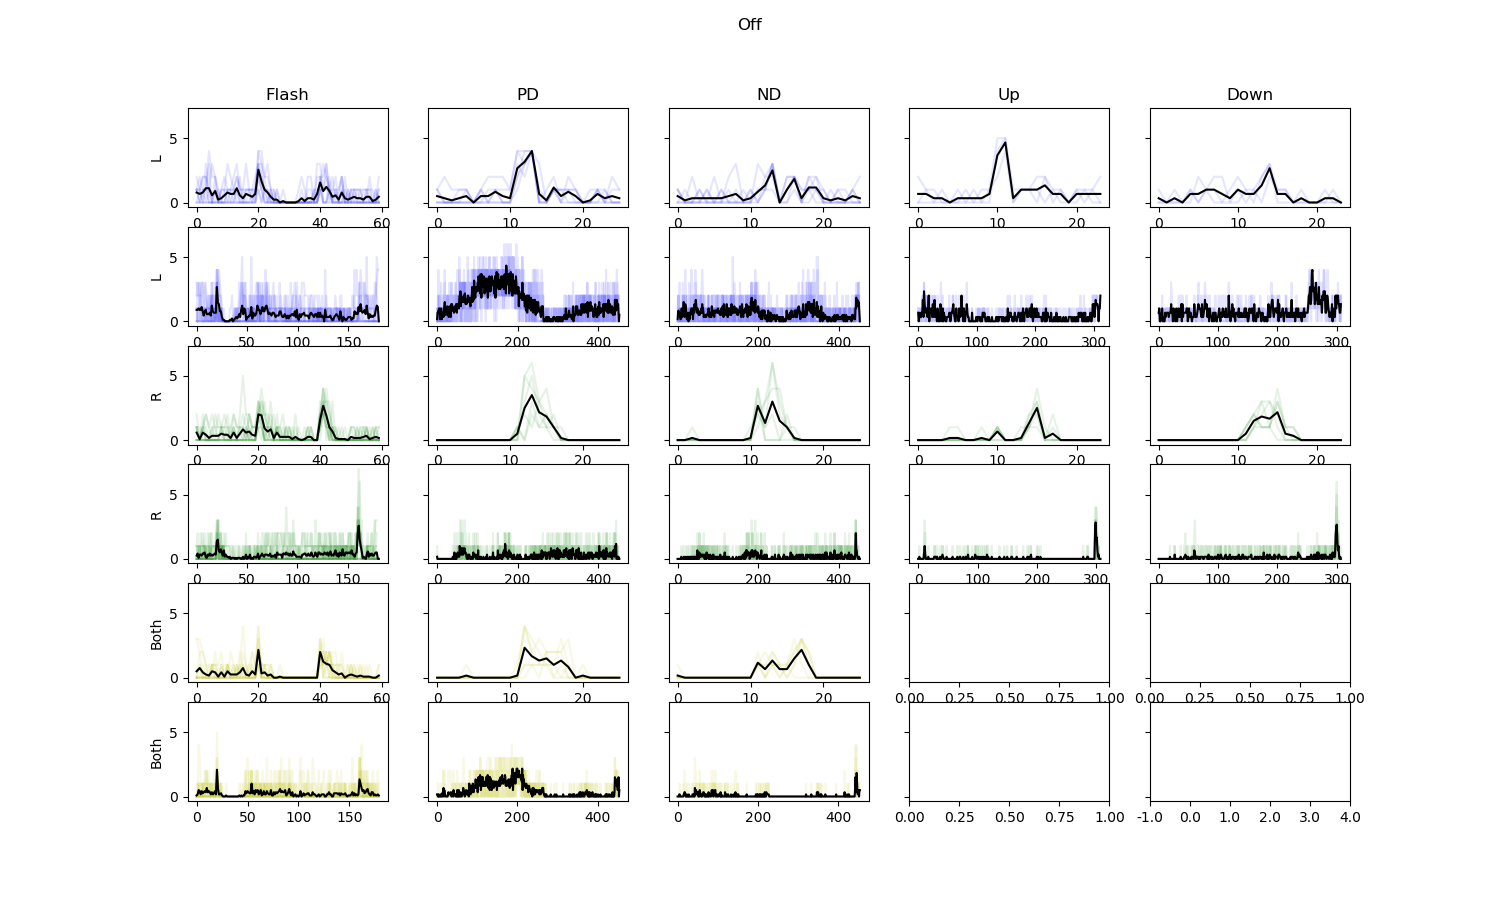

In [219]:
# #Off old 
# #L
# fig, axes = plt.subplots(6, 5, sharey=True, sharex=False,figsize=(15,9))
# fig.suptitle('Off')
# axes[0, 0].set_title('Flash'); axes[0, 1].set_title('PD'); axes[0, 2].set_title('ND'); axes[0, 3].set_title('Up'); axes[0, 4].set_title('Down')
# for i in range(FlashOfflenRawL):
#     axes[0, 0].plot(FlashOffRawL.iloc[i,:][2:].values, 'b',alpha = 0.1)
#     axes[1, 0].plot(FlashOffRawL.iloc[i+FlashOfflenRawL,:][2:].values, 'b',alpha = 0.1)
# axes[0, 0].plot(FlashOffMeanL.iloc[0,:][2:].values,'k')
# axes[1, 0].plot(FlashOffMeanL.iloc[1,:][2:].values,'k')
# axes[0, 0].set_ylabel('L'); axes[1, 0].set_ylabel('L');


# for i in range(EdgeOfflenRawL):
#     axes[0, 1].plot(EdgeOffRawL.iloc[i+EdgeOfflenRawL*3,:][2:].values, 'b',alpha = 0.1)
#     axes[1, 1].plot(EdgeOffRawL.iloc[i+EdgeOfflenRawL*2,:][2:].values, 'b',alpha = 0.1)
#     axes[0, 2].plot(EdgeOffRawL.iloc[i,:][2:].values, 'b',alpha = 0.1)
#     axes[1, 2].plot(EdgeOffRawL.iloc[i+EdgeOfflenRawL,:][2:].values, 'b',alpha = 0.1)
# axes[0, 1].plot(EdgeOffMeanL.iloc[2,:][2:].values,'k')
# axes[1, 1].plot(EdgeOffMeanL.iloc[0,:][2:].values,'k')
# axes[0, 2].plot(EdgeOffMeanL.iloc[3,:][2:].values,'k')
# axes[1, 2].plot(EdgeOffMeanL.iloc[1,:][2:].values,'k')

# for i in range(EdgeOfflenRawLv):
#     axes[0, 3].plot(EdgeOffRawLv.iloc[i+EdgeOfflenRawLv*3,:][2:].values, 'b',alpha = 0.1)
#     axes[1, 3].plot(EdgeOffRawLv.iloc[i+EdgeOfflenRawLv*2,:][2:].values, 'b',alpha = 0.1)
#     axes[0, 4].plot(EdgeOffRawLv.iloc[i,:][2:].values, 'b',alpha = 0.1)
#     axes[1, 4].plot(EdgeOffRawLv.iloc[i+EdgeOfflenRawLv,:][2:].values, 'b',alpha = 0.1)
# axes[0, 3].plot(EdgeOffMeanLv.iloc[2,:][2:].values,'k')
# axes[1, 3].plot(EdgeOffMeanLv.iloc[0,:][2:].values,'k')
# axes[0, 4].plot(EdgeOffMeanLv.iloc[3,:][2:].values,'k')
# axes[1, 4].plot(EdgeOffMeanLv.iloc[1,:][2:].values,'k')

# #R
# for i in range(FlashOfflenRawR):
#     axes[2, 0].plot(FlashOffRawR.iloc[i,:][2:].values, 'g',alpha = 0.1)
#     axes[3, 0].plot(FlashOffRawR.iloc[i+FlashOfflenRawR,:][2:].values, 'g',alpha = 0.1)
# axes[2, 0].plot(FlashOffMeanR.iloc[0,:][2:].values,'k')
# axes[3, 0].plot(FlashOffMeanR.iloc[1,:][2:].values,'k')

# for i in range(EdgeOfflenRawR):
#     axes[2, 1].plot(EdgeOffRawR.iloc[i+EdgeOfflenRawR*3,:][2:].values, 'g',alpha = 0.1)
#     axes[3, 1].plot(EdgeOffRawR.iloc[i+EdgeOfflenRawR*2,:][2:].values, 'g',alpha = 0.1)
#     axes[2, 2].plot(EdgeOffRawR.iloc[i,:][2:].values, 'g',alpha = 0.1)
#     axes[3, 2].plot(EdgeOffRawR.iloc[i+EdgeOfflenRawR,:][2:].values, 'g',alpha = 0.1)
# axes[2, 1].plot(EdgeOffMeanR.iloc[2,:][2:].values,'k')
# axes[3, 1].plot(EdgeOffMeanR.iloc[0,:][2:].values,'k')
# axes[2, 2].plot(EdgeOffMeanR.iloc[3,:][2:].values,'k')
# axes[3, 2].plot(EdgeOffMeanR.iloc[1,:][2:].values,'k')

# for i in range(EdgeOfflenRawRv):
#     axes[2, 3].plot(EdgeOffRawRv.iloc[i+EdgeOfflenRawRv*3,:][2:].values, 'g',alpha = 0.1)
#     axes[3, 3].plot(EdgeOffRawRv.iloc[i+EdgeOfflenRawRv*2,:][2:].values, 'g',alpha = 0.1)
#     axes[2, 4].plot(EdgeOffRawRv.iloc[i,:][2:].values, 'g',alpha = 0.1)
#     axes[3, 4].plot(EdgeOffRawRv.iloc[i+EdgeOfflenRawRv,:][2:].values, 'g',alpha = 0.1)
# axes[2, 3].plot(EdgeOffMeanRv.iloc[2,:][2:].values,'k')
# axes[3, 3].plot(EdgeOffMeanRv.iloc[0,:][2:].values,'k')
# axes[2, 4].plot(EdgeOffMeanRv.iloc[3,:][2:].values,'k')
# axes[3, 4].plot(EdgeOffMeanRv.iloc[1,:][2:].values,'k')
# axes[2, 0].set_ylabel('R'); axes[3, 0].set_ylabel('R');


# #both
# for i in range(FlashOfflenRaw):
#     axes[4, 0].plot(FlashOffRaw.iloc[i,:][2:].values, 'y',alpha = 0.1)
#     axes[5, 0].plot(FlashOffRaw.iloc[i+FlashOfflenRaw,:][2:].values, 'y',alpha = 0.1)
# axes[4, 0].plot(FlashOffMean.iloc[0,:][2:].values,'k')
# axes[5, 0].plot(FlashOffMean.iloc[1,:][2:].values,'k')

# for i in range(EdgeOfflenRaw):
#     axes[4, 1].plot(EdgeOffRaw.iloc[i+EdgeOfflenRaw*3,:][2:].values, 'y',alpha = 0.1)
#     axes[5, 1].plot(EdgeOffRaw.iloc[i+EdgeOfflenRaw*2,:][2:].values, 'y',alpha = 0.1)
#     axes[4, 2].plot(EdgeOffRaw.iloc[i,:][2:].values, 'y',alpha = 0.1)
#     axes[5, 2].plot(EdgeOffRaw.iloc[i+EdgeOfflenRaw,:][2:].values, 'y',alpha = 0.1)
# axes[4, 1].plot(EdgeOffMean.iloc[2,:][2:].values,'k')
# axes[5, 1].plot(EdgeOffMean.iloc[0,:][2:].values,'k')
# axes[4, 2].plot(EdgeOffMean.iloc[3,:][2:].values,'k')
# axes[5, 2].plot(EdgeOffMean.iloc[1,:][2:].values,'k')
# axes[4, 0].set_ylabel('Both'); axes[5, 0].set_ylabel('Both');

# plt.xticks(axes[0,0].get_xticks(),axes[0,0].get_xticks()*0.05)
# plt.show()
# plt.savefig(csvroot+'Pics/'+ stimulus +'Off_sharey.png')